# Honors Project: Exploratory Data Analysis For Machine Learning

## 1. About The Data

The data is titled "Ecommerce Customer Churn Analysis and Prediction" and the source is from Kaggle and has file format of xlsx. It is not specified on Kaggle, where data is orginally sourced. The links to the kaggle for the dataset is https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction. On the data there is 2 sheets that is 'Data Dict' and 'Ecomm' which we only will use Ecomm sheet. From now 'Ecomm' sheet shall be refer as "dataset". 

The datasets has 20 rows. In general the rows has indication about Churn Flag, customer data for online behaviour, transactional data, and the data about customer's demographic. Here is the explanation about the column in the data:
- CustomerID: Unique customer ID
- Churn: Churn Flag <u>(as the target variables)</u>
- Tenure: Tenure of customer in organization
- PreferredLoginDevice: Preferred login device of customer
- CityTier: City tier where the customer live
- WarehouseToHome: Distance in between warehouse to home of customer
- PreferredPaymentMode: Preferred payment method of customer
- Gender: Gender of customer
- HourSpendOnApp: Number of hours spend on mobile application or website
- NumberOfDeviceRegistered: Total number of deceives is registered on particular customer
- PreferedOrderCat: Preferred order category of customer in last month
- SatisfactionScore: Satisfactory score of customer on service
- MaritalStatus: Marital status of customer
- NumberOfAddress: Total number of address added on particular customer
- Complain: Any complaint has been raised in last month
- OrderAmountHikeFromlastYear: Percentage increases in order from last year
- CouponUsed: Total number of coupon has been used in last month
- OrderCount: Total number of orders has been places in last month
- DaySinceLastOrder: Day Since last order by customer
- CashbackAmount: Average cashback in last month

**Why this data ?**
- Has a variety of features both numerical and categorical
- Although the data is about churn like those in the course, the data is in the context of online sales/e-commerce
- Has missing data too so there is possibility to practice the data cleaning in this course independently from the practice lab
- The target variables is categorical data which is quite different from the practice or demo lab that on this course which allows for independent exploration by myself to improve my understanding outside on the courses

## 2. Initial Plan for Data Exploration
There is rough plan for the data exploration which is divided into 3 stages that is checking the data, data cleaning, and data exploration:
1. Checking the data
    * Checking the data type of each column
    * Checking if there is missing value and duplicates
    * Identify which one is the categorical and which one is the categorical and numerical variable
    * Checking the unique value or categorical variable (with the exception of CustomerID)
2. Data Cleaning
    * Identify if there is any duplicates in the data or not
    * Based on the checking of data cleaning do actions for the missing value (the actions will be done accodring to situation)
    * Identify outliers in numerical variables using combination of plots and statistics
    * If there is outliers, do several methods to cope with outliers
3. Data Explorations Analysis
    * Do all the summary statistics for numerical variable and if possible for the categorical variables
    * Create appropriate plot for all the features
    * Checking correlations of the numerical variables and the target variables using appropriate plots or statistics
    * If possible checking on correlations between categorical variables and target variables
    * For feature engineering shall be done appropriately according to situations
    
For hyoptesis tesing, inference, and perhaps seeing correlation and causation shall be done (perhaps there will be summary on what will i do on the before dive into hypotetical testing) according to the result of data exploration

## 3. Preparing the Packages and Reading the Data

The packages that will be used is:
- pandas for managing the data.
- numpy for mathematical operations.
- mathplotlib for visualising the data.
- seaborn for visualising the data.
- sklearn for machine learning and machine-learning-pipeline related.
- scipy for statistical computations.
- statsmodels for statistical analysis

In [1]:
# Preparing the Packages (perhaps will be redundant in the next)
import pandas as pd # for dataframe analysis
import numpy as np #for mathematical operation and array operation
import matplotlib.pyplot as plt #for graph
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from scipy import stats as stats
from scipy.stats import norm
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

import matplotlib.gridspec as gridspec

In [2]:
# Reading the data in xlsx
filepath='D:/Coursera/IBM Machine Learning/1. Exploratory/Week 5 Honors Project/E Commerce Dataset.xlsx'
data=pd.read_excel(filepath,sheet_name="E Comm")

## 4. Data Exploration

### 4.a. Understanding and Checking the Data

On this section, i will check the data type of each features, unique value in the categorical features and if there is any missing value in each feature. After each code is running, i will try to give brief explanation or what the meaning of each result (also to test my understanding).

#### 4.a.i. Checking Data type

In [3]:
# Checking data type
print(data.shape)
data.info()

(5630, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberO

In [4]:
data.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

The data has 5630 rows (excluding the header) and has 20 features (as evidenced by the number of column). After quick look, it can be seen that most of the features has data type of float64. The features on the data is has data type of either float64, int64, and object. For feature with data type of float64, they are numerical continuous variable. While int64 seems to be number, it is possible that they are categorical variable which means that features with this data type need to be dig deeper to see if they are categorical variable or not (with the exception of CustomerID. For object variable, they are certainly categorical variable. 

Because of the data has 5630 rows, then from the above result we can know that few of the features has missing value since their non-null count is below 5630 which we will see later on in the next code.

#### 4.a.ii. Identify Which Feature that Has Data Type of int64 is Categorical

In [5]:
# identify if the features with data type of int64 is categorical features or not
cand_category=data.select_dtypes(include=['int64']).drop(columns=['CustomerID'])
for column in cand_category:
    unique_value=cand_category[column].value_counts()
    print(f"Value counts for '{column}':\n{unique_value}\n")

Value counts for 'Churn':
0    4682
1     948
Name: Churn, dtype: int64

Value counts for 'CityTier':
1    3666
3    1722
2     242
Name: CityTier, dtype: int64

Value counts for 'NumberOfDeviceRegistered':
4    2377
3    1699
5     881
2     276
1     235
6     162
Name: NumberOfDeviceRegistered, dtype: int64

Value counts for 'SatisfactionScore':
3    1698
1    1164
5    1108
4    1074
2     586
Name: SatisfactionScore, dtype: int64

Value counts for 'NumberOfAddress':
2     1369
3     1278
4      588
5      571
6      382
1      371
8      280
7      256
9      239
10     194
11      98
19       1
22       1
21       1
20       1
Name: NumberOfAddress, dtype: int64

Value counts for 'Complain':
0    4026
1    1604
Name: Complain, dtype: int64



It could be said that all variable with data type of tipe int64 (with the exception of CustomerID) is categorical variable. While we could be tempted to have feature such as NumberOfDeviceRegistered and NUmberOfAddress as numerical, i think it would be better for them as categorical variable since it seems that in general sense people usually don't have more than 5 phone or 4 address (afterall having one already hard anyway). 

For most of the feature most of them are suitable already but some need recategorisation. For NumberOfAddress feature, it seems that few of that category can be merge as single category such as 11,10,22,21,and 20 since their value is quite small and perhaps will be convenient to modelit like that. The matter of this merging shall be done on the data exploration subsection later on.

#### 4.a.iii. Seeing Category on Other Categorical Variable (for data type object)

In [6]:
category=data.select_dtypes(include=['object'])
for column in category:
    unique_value=category[column].value_counts()
    print(f"Value counts for '{column}':\n{unique_value}\n")

Value counts for 'PreferredLoginDevice':
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value counts for 'PreferredPaymentMode':
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value counts for 'Gender':
Male      3384
Female    2246
Name: Gender, dtype: int64

Value counts for 'PreferedOrderCat':
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value counts for 'MaritalStatus':
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



For all of those categorical variable with the exception of PreferredPaymentMode, the category is already has sufficient numbers to stand on it's own as category and there is no need to edit the category since there is also no overlap in those category. For PreferredPaymentMode there is overlap on certain category like CC and Credit Card then also COD and Cash on Delivery which will need to be merged. This shall be done in Data Explorations subsection later on since this will involve feature engineering.

#### 4.a.iv. Checking if There is Any Duplicates 

In [7]:
are_there_duplicates = data.duplicated().any()
are_there_duplicates

False

Since there is no duplicate row, there is no need for handling the duplicates in the next subsection

#### 4.a.v. Identify Where The Missing Value And The Scale of It

In [8]:
# summing all the missing value 
null=data.isnull().sum()
tipe=data.dtypes
df=pd.DataFrame({'Null Count':null,'Data Type':tipe})
print(df)

                             Null Count Data Type
CustomerID                            0     int64
Churn                                 0     int64
Tenure                              264   float64
PreferredLoginDevice                  0    object
CityTier                              0     int64
WarehouseToHome                     251   float64
PreferredPaymentMode                  0    object
Gender                                0    object
HourSpendOnApp                      255   float64
NumberOfDeviceRegistered              0     int64
PreferedOrderCat                      0    object
SatisfactionScore                     0     int64
MaritalStatus                         0    object
NumberOfAddress                       0     int64
Complain                              0     int64
OrderAmountHikeFromlastYear         265   float64
CouponUsed                          256   float64
OrderCount                          258   float64
DaySinceLastOrder                   307   float64


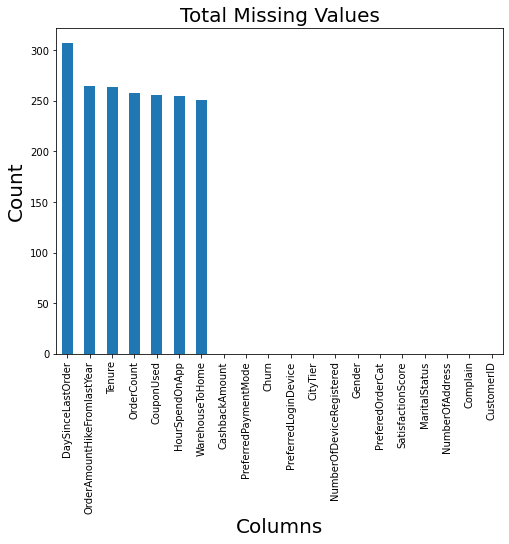

In [10]:
# making visualisastion to plot missing value to understand it quicker
nu=null.sort_values(ascending=False)
nu.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20);

We could see that on this data, there are 7 features that has the missing value. Aldo all the missing value are on features with data type float64 or they are numerical variables. With the fact that there are only 5630 rows and the minimal value of missing value on each feature (that has it) is 251 this means that at least 4,46% of the data on that features is missing and with the maximum being 307, there is 5,45% of the data missing. This is quite a lot in which this will be one of the main consideration on the action to cope with the missing value later on.

### 4.b. Data Cleaning

On this section, there will be handling of missing value (there is no need actually <u>just for demonstration</u>) and duplicates and then also identify then handling the outliers.

#### 4.b.i Handling of Duplicates

In [11]:
# dropping the duplicates -> afterall there is only 10 of them
data.drop_duplicates

<bound method DataFrame.drop_duplicates of       CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0   

since there is no duplicate row, the resulting dataset will remain the same.

#### 4.b.ii. Handling of Missing Value

As already stated before on previous subsection, there is 7 feature that has missing value. However the each feature has minimal of 251 to the maximum of 307 missing value and if they are being drop we could lose around 4,46%-5,45% of the data hich could be valuable insight. However there is some reservation on fill it up using some value.

In [12]:
# see how many rows will be drop if all rows with missing value 
null=data[data.isnull().any(axis=1)]
null

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,55611,0,9.0,Mobile Phone,2,33.0,Debit Card,Female,3.0,4,Fashion,1,Single,3,1,17.0,2.0,2.0,NaN,213.37
5621,55622,1,14.0,Mobile Phone,3,35.0,E wallet,Male,3.0,5,Fashion,5,Married,6,1,14.0,3.0,NaN,1.0,233.54
5622,55623,0,13.0,Mobile Phone,3,31.0,E wallet,Female,3.0,5,Grocery,1,Married,2,0,12.0,4.0,NaN,7.0,245.31
5623,55624,0,5.0,Computer,1,12.0,Credit Card,Male,4.0,4,Laptop & Accessory,5,Single,2,0,20.0,2.0,2.0,NaN,224.36


There is 1856 rows or around 32,97% of the data will lost if the rows with missing value is drop. This is quite untolerable since this will lose the data characteristics. There is need further explorations for deciding the methods to move foward to decide if fill the missing value or mask the data. However since this numerical value it seems that masking the value will not good and better for imputation/fill the missing value. For determine which will be better, there is the need for further exploration through distplot and boxplot.

In [13]:
#taking column that has missing value
name=data.columns[data.isnull().any()].tolist()
dframe=data[name]

In [14]:
#creating gridplot for all subplots
import matplotlib.gridspec as gridspec

num_rows = len(dframe.columns)
fig = plt.figure(figsize=(12, 6*num_rows))
gs = gridspec.GridSpec(num_rows, 2, width_ratios=[1, 1.5])

<Figure size 864x3024 with 0 Axes>

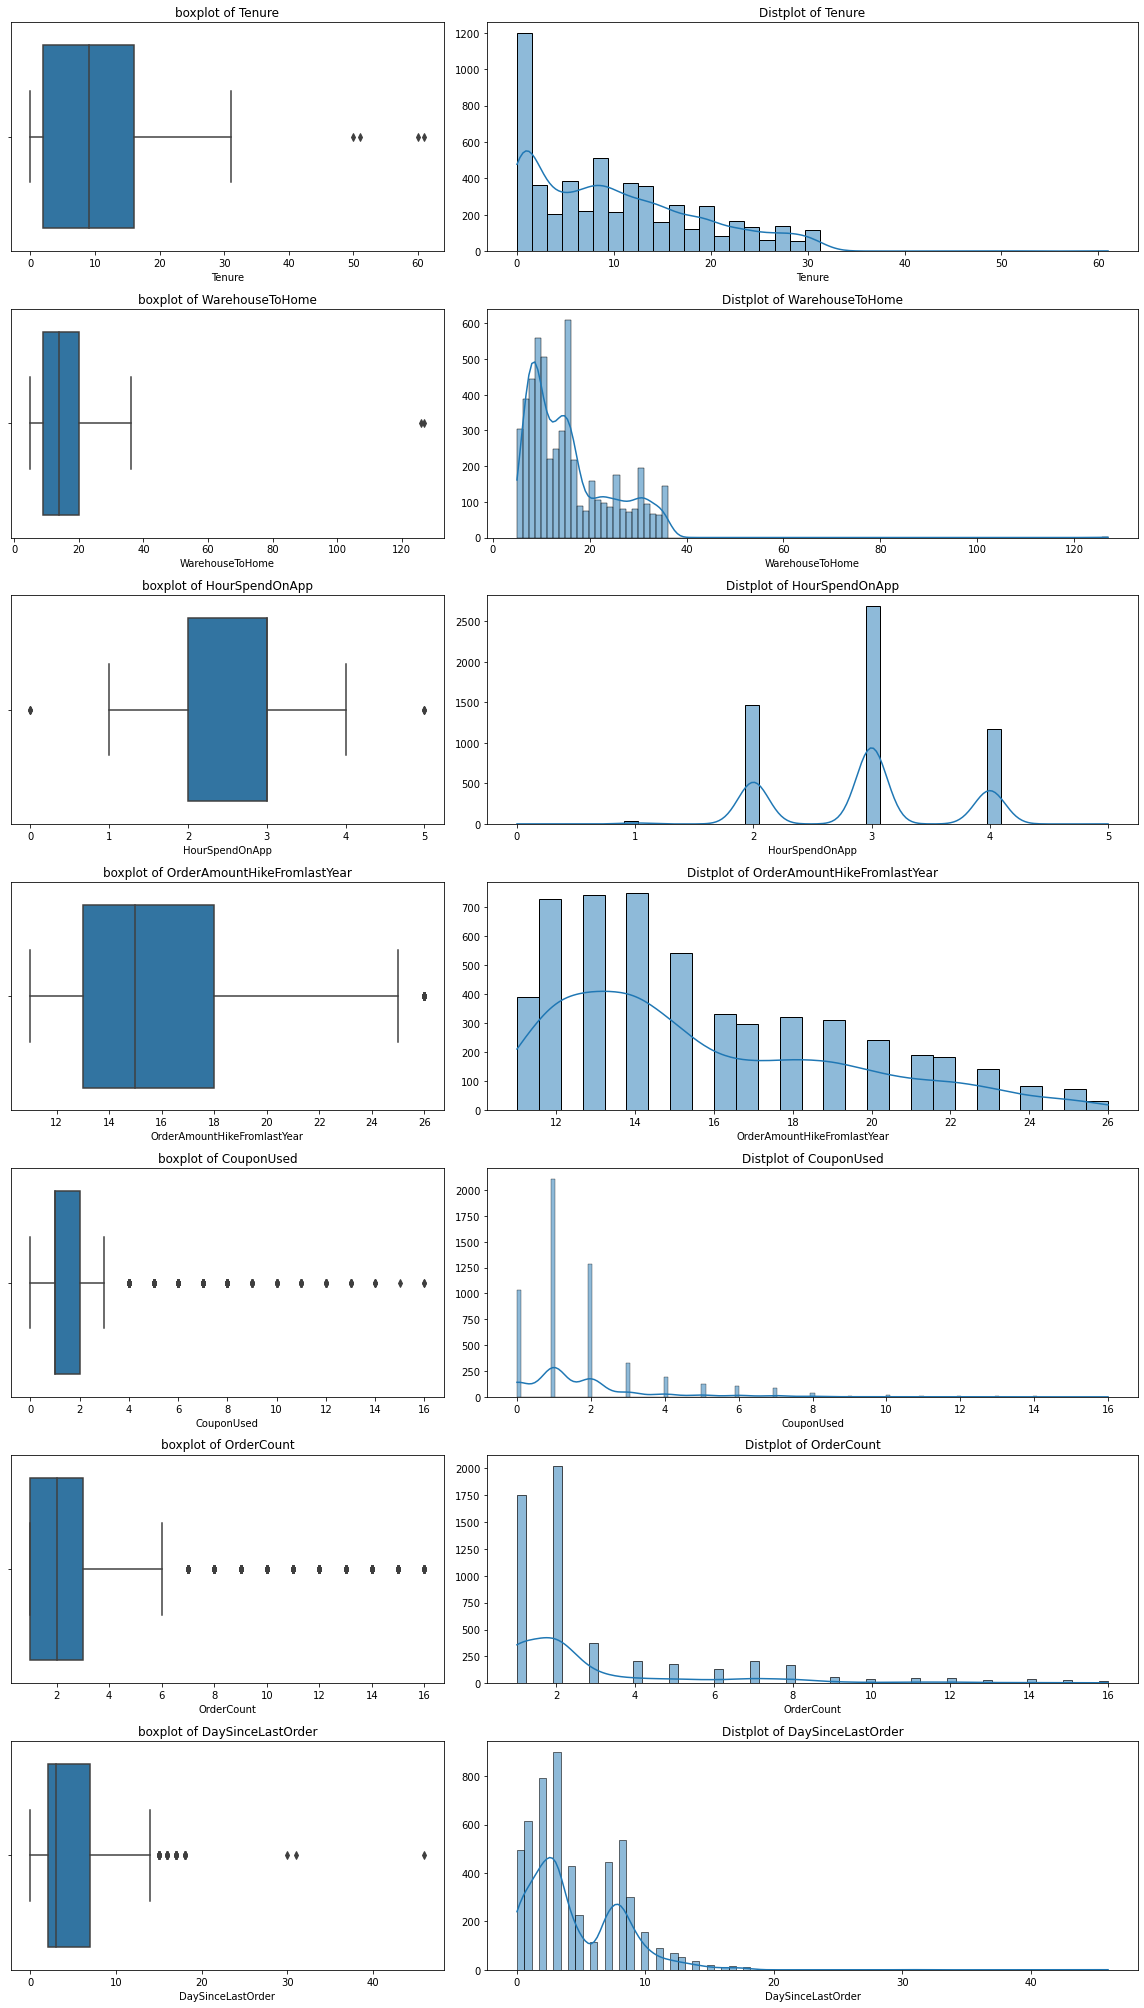

In [15]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 28))
for i, column in enumerate(dframe.columns):
    ax1 = plt.subplot(gs[i, 0])
    sns.boxplot(x=dframe[column], ax=ax1)
    ax1.set_title(f'boxplot of {column}')
    
    ax2 = plt.subplot(gs[i, 1])
    sns.histplot(dframe[column],kde=True, ax=ax2)
    ax2.set_title(f'Distplot of {column}')
    
     # Remove y-axis labels for better visual alignment
    ax1.set(ylabel="")
    ax2.set(ylabel="")

plt.tight_layout()
plt.show()

It can be seen from the picture above that all the feature that has missing value has at least 1 outliers and most of them has positive skew with quite a long tail to the right. While the distribution of HourSpendOnApp feature loook very strange, it is actually quite skew to the right. This is due to the misleading of images as evidenced in the result below in which the value of data in that particular feature is only stated in interger and those in between are not being seen which probably because of records that being kept is always measure in hour and if it's not interger they just round it up or below.

Perhaps now the best way to impute the missing value is not by giving just single value as it could bias some feature. To impute multiple value i will not use predictive imputations but i shall give imputations appropriately based on what i could find if the data is split according to the churn flag.

In [16]:
data.HourSpendOnApp.value_counts()

3.0    2687
2.0    1471
4.0    1176
1.0      35
5.0       3
0.0       3
Name: HourSpendOnApp, dtype: int64

In [17]:
#create list of name the column that will be taken
taken=name
taken.append("Churn")
cluster=data[taken]

#divide the dataset of feature that has missing value based on churn
clu_0=cluster[cluster["Churn"]==0]
clu_1=cluster[cluster["Churn"]==1]

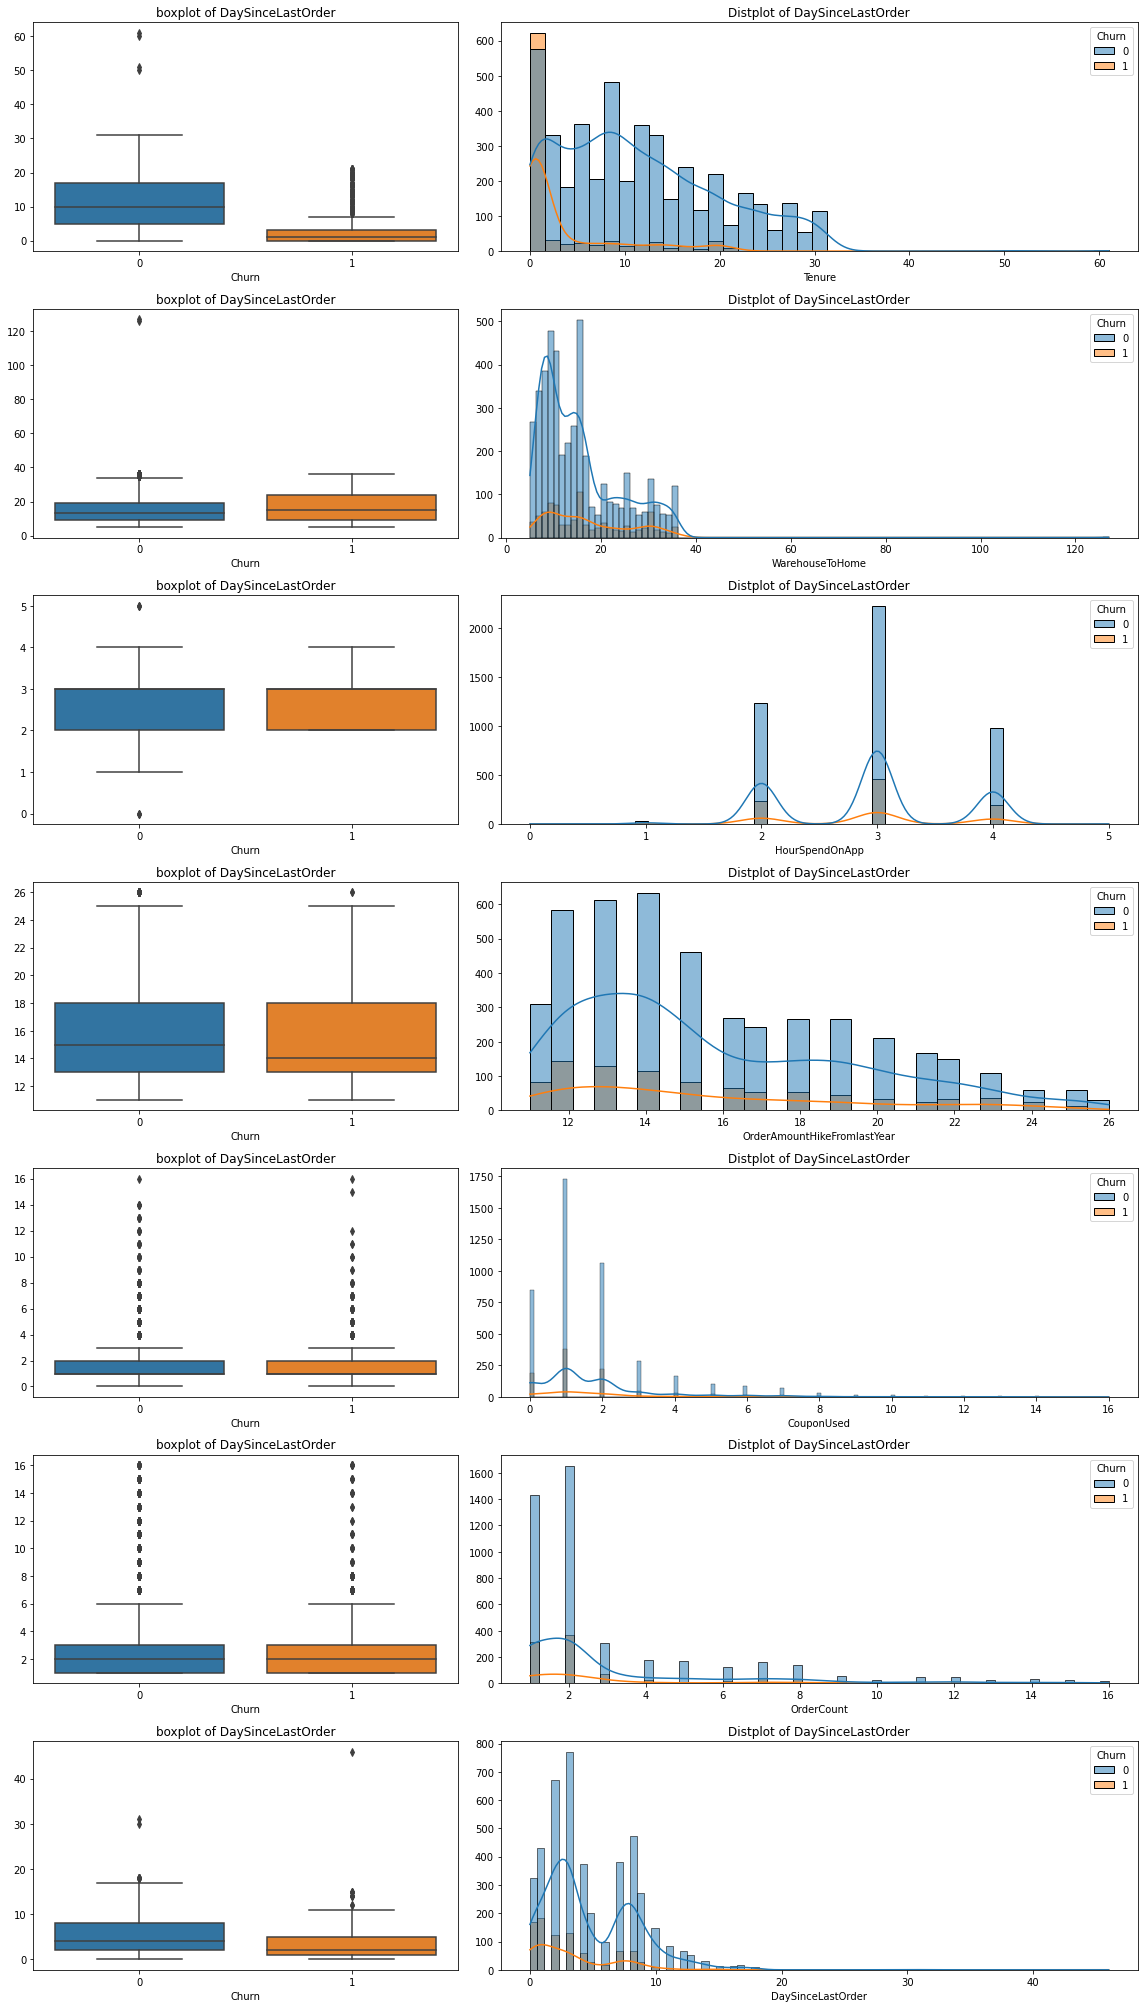

In [18]:
#create plot for those that has churn flag of 0 and 1 and also compared them side by side
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 28))
for i in range(0,len(taken)-1):
    ax1 = plt.subplot(gs[i, 0])
    sns.boxplot(y=cluster.iloc[:,i],x="Churn", data=cluster, ax=ax1)
    ax1.set_title(f'boxplot of {column}')
    
    ax2 = plt.subplot(gs[i, 1])
    sns.histplot(x=name[i], data=cluster,hue="Churn",kde=True, ax=ax2)
    ax2.set_title(f'Distplot of {column}')
    
     # Remove y-axis labels for better visual alignment
    ax1.set(ylabel="")
    ax2.set(ylabel="")

plt.tight_layout()
plt.show()

The characteristics generally the same that is the data on each churn flag and feature has outliers and positively skewed. However the distribution on each churn flag is quite different and therefore it is quite suitable to have different value for imputations based on churn flag the data has. In the end i decided to use median on each churn flag for certain category to impute the missing value on the data. This is due to the fact that the data is quite posi. this could be further shown in the summary statistics in below in which most of the mean has higher value than the median due to the positive skewness

In [19]:
# seeing the summary statistics on each feature and churn flag
for i in range(0,len(taken)-1):
    print(cluster.iloc[:,[i,7]].groupby("Churn").describe())
#grouped_stats.T.rename(index={'mean': 'Mean', 'median': 'Median', 'std': 'Std', 'min': 'Min', 'max': 'Max'})

       Tenure                                                 
        count       mean       std  min  25%   50%   75%   max
Churn                                                         
0      4499.0  11.502334  8.419217  0.0  5.0  10.0  17.0  61.0
1       867.0   3.379469  5.486089  0.0  0.0   1.0   3.0  21.0
      WarehouseToHome                                                  
                count       mean       std  min  25%   50%   75%    max
Churn                                                                  
0              4515.0  15.353931  8.483276  5.0  9.0  13.0  19.0  127.0
1               864.0  17.134259  8.631132  5.0  9.0  15.0  24.0   36.0
      HourSpendOnApp                                             
               count      mean       std  min  25%  50%  75%  max
Churn                                                            
0             4485.0  2.925530  0.727184  0.0  2.0  3.0  3.0  5.0
1              890.0  2.961798  0.694427  2.0  2.0  3.0  3.0 

In [20]:
# Time to copy my dataset so that since the replaced missing will be a lot it is better to make duplicates
# it is to prevent risk if the codes gone wrong
DF=data.copy()
DF

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [21]:
features_to_fill=taken[:-1]
for feature in features_to_fill:
    #for the one with churn flag of 0
    condition = (DF['Churn'] == 0)
    subset = DF.loc[condition, feature]
    # Calculate the median for the subset
    median_val = subset.median()
    # Fill missing values in the subset with the median value
    DF.loc[condition, feature]=subset.fillna(median_val)
    
    #for the one with churn flag of 1
    condition = (DF['Churn'] == 1)
    subset = DF.loc[condition, feature]
    # Calculate the median for the subset
    median_val = subset.median()
    # Fill missing values in the subset with the median value
    DF.loc[condition, feature]=subset.fillna(median_val)

In [22]:
DF.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

The above code for looping is to fill the missing value on 7 features based on the value on their Churn Flag. So if the churn flag on certain row in some feature say "Tenure"  is 0, then that particular row will be filled using median value of the (not missing) data in "Tenure" that has Churn of 1. This is different from the missing value of "Tenure" that has Churn flag of 1 then the missing value will use median value of the (not missing) data in "Tenure" that has Churn flag of 1. The algorithm involve their is in few step:
1. Split the condition for the churn flag
2. Extract the subset of dataframe that has the condition and feature on it
3. Calculate the median value on each subset
4. Fill the missing value on the each subset using their respective median
5. Overwrite dataset that has similar condition with dataframe with thw already filled subset 

As being seen, now the dataframe that i have now is already have no missing value :)

#### 4.b.iii. Identify Outliers in Numerical Feature

On this section, i will identify outliers in all the numerical feature (so categorical variable will not). I shall try to use both univariate and bi-variate analysis since perhaps the unicariate analysis will eliminate most value. SInce the target variable on this case is Churn Flag is categorical anyway perhaps there is possibility that some value will be tolerated.

##### Univariate Analysis

In [23]:
# Create subdata for the numerical data only
numer=DF.select_dtypes(include=['float64'])

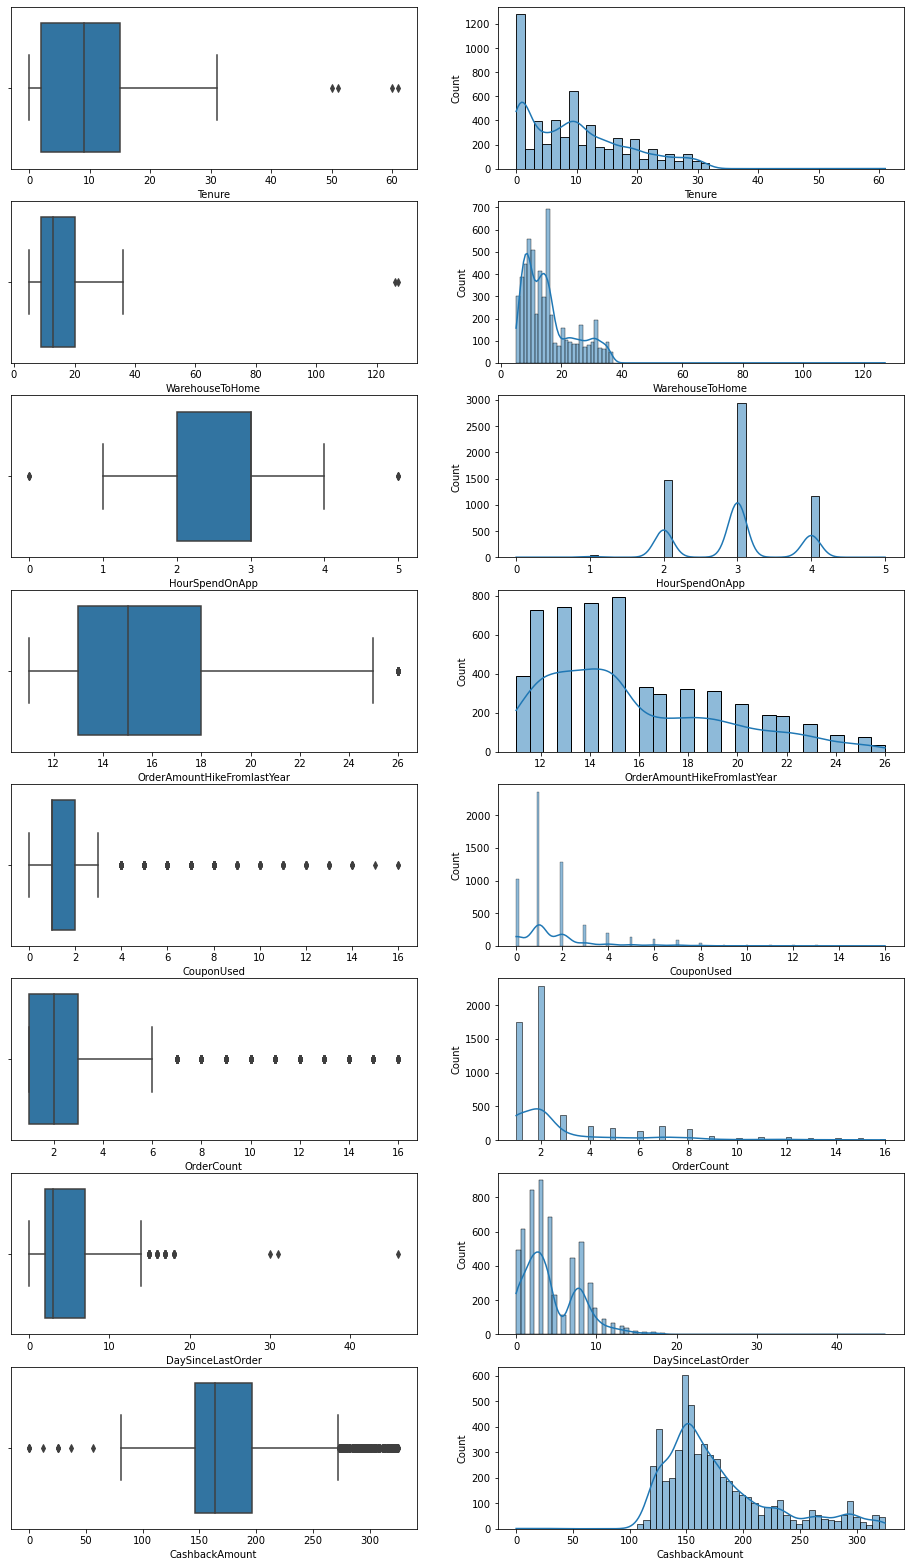

In [24]:
# create subplots with rows matching the 
fig, axes = plt.subplots(nrows=numer.shape[1], ncols=2, figsize=(16, 28))
for i, column in enumerate(numer.columns):
    #ax1 = plt.subplot(gs[i, 0])
    sns.boxplot(x=numer[column], ax=axes[i, 0])
    ax1.set_title(f'boxplot of {column}')
    
    #ax2 = plt.subplot(gs[i, 1])
    sns.histplot(data=numer[column],kde=True, ax=axes[i, 1])
    ax2.set_title(f'Distplot of {column}')
    
     # Remove y-axis labels for better visual alignment
    ax1.set(ylabel="")
    ax2.set(ylabel="")

All of the numerical feature in the data has outliers to the right. Many of the feature has many outliers in the right. Only 2 features has outliers to the left but quite not really dominant. To see the how many outliers and how those could impact the data if "removed", i should see the numbers.

In [25]:
#calculate IQR
Q1 = numer.quantile(0.25)
Q3 = numer.quantile(0.75)
IQR = Q3 - Q1

#The bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#aggregate the number of outliers
outliers_count = ((numer < lower_bound) | (numer > upper_bound)).sum()

#print("Number of outliers in each numeric column:")
print(outliers_count)

Tenure                           4
WarehouseToHome                  2
HourSpendOnApp                   6
OrderAmountHikeFromlastYear     33
CouponUsed                     629
OrderCount                     703
DaySinceLastOrder               62
CashbackAmount                 438
dtype: int64


While some features has quite very few (<10) outliers such as Tenure, WarehouseToHome, HourSpendOnAPP there is also 3 features that has very high outliers (>100) or at least more than 7,5%-12% of the data will be dropped if they are removed. 

##### Bi-Variate Analysis

In [26]:
numer=DF.select_dtypes(include=['float64'])
numerbi=DF.select_dtypes(include=['float64'])
numerbi["Churn"]=DF["Churn"]
numerbi

<ipython-input-26-d43d6a3c5a07>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerbi["Churn"]=DF["Churn"]


,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,4.0,6.0,3.0,11.0,1.0,1.0,5.0,159.93,1
1,1.0,8.0,3.0,15.0,0.0,1.0,0.0,120.90,1
2,1.0,30.0,2.0,14.0,0.0,1.0,3.0,120.28,1
3,0.0,15.0,2.0,23.0,0.0,1.0,3.0,134.07,1
4,0.0,12.0,3.0,11.0,1.0,1.0,3.0,129.60,1
...,...,...,...,...,...,...,...,...,...
5625,10.0,30.0,3.0,18.0,1.0,2.0,4.0,150.71,0
5626,13.0,13.0,3.0,16.0,1.0,2.0,4.0,224.91,0
5627,1.0,11.0,3.0,21.0,1.0,2.0,4.0,186.42,0
5628,23.0,9.0,4.0,15.0,2.0,2.0,9.0,178.90,0


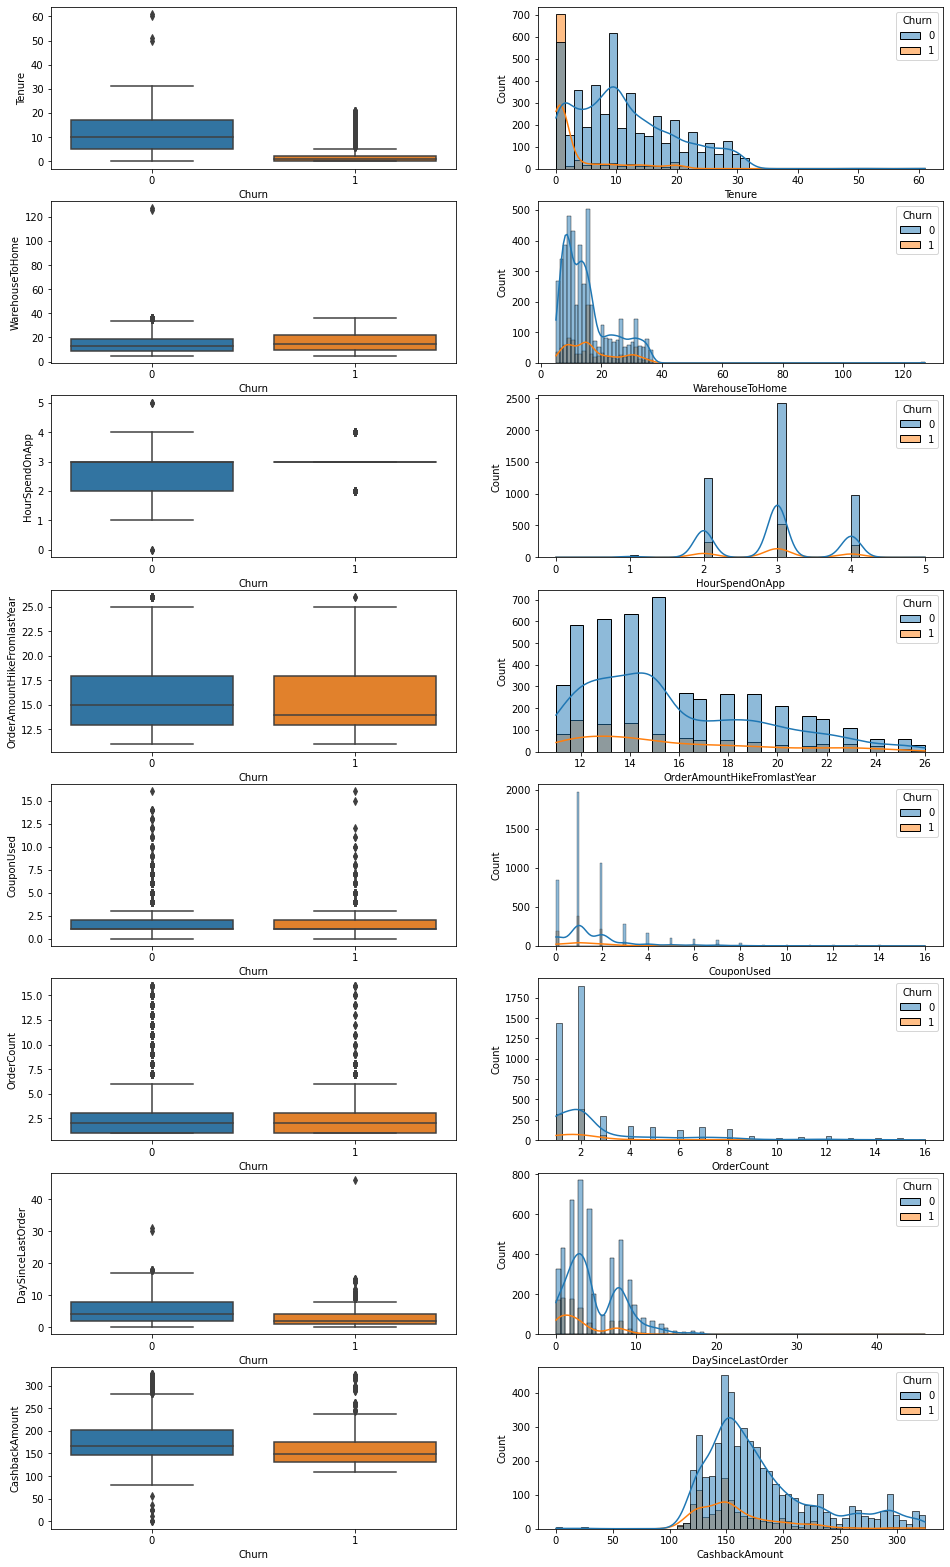

In [27]:
fig, axes = plt.subplots(nrows=numer.shape[1], ncols=2, figsize=(16, 28))
for i, column in enumerate(numer.columns):
    #ax1 = plt.subplot(gs[i, 0])
    sns.boxplot(y=column,x="Churn", data=numerbi, ax=axes[i, 0])
    ax1.set_title(f'boxplot of {column}')
    
    #ax2 = plt.subplot(gs[i, 1])
    sns.histplot(x=column, data=numerbi,hue="Churn",kde=True, ax=axes[i, 1])
    ax2.set_title(f'Distplot of {column}')
    
     # Remove y-axis labels for better visual alignment
    ax1.set(ylabel="")
    ax2.set(ylabel="")


In [28]:
grouped = numerbi.groupby('Churn')

#calculate IQR
Q1 = grouped.quantile(0.25)
Q3 = grouped.quantile(0.75)
IQR = Q3 - Q1

#The bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#aggregate the number of outliers
#seperate between 0 and 1
numerbi0=numerbi[numerbi["Churn"]==0]
outliers_count0 = ((numerbi0 < lower_bound.iloc[0,:]) | (numerbi0 > upper_bound.iloc[0,:])).sum()

numerbi1=numerbi[numerbi["Churn"]==1]
outliers_count1 = ((numerbi1 < lower_bound.iloc[1,:]) | (numerbi1 > upper_bound.iloc[1,:])).sum()

outliers_cou = pd.DataFrame({
                    '0': outliers_count0,
                    '1': outliers_count1,
                    'Total Bivariate':outliers_count0+outliers_count1,
                    'Total Univariate': outliers_count,
                    'delta':outliers_count0+outliers_count1-outliers_count
                })
print("Number of outliers in each numeric column:")
print(outliers_cou)

Number of outliers in each numeric column:
                               0    1  Total Bivariate  Total Univariate  \
CashbackAmount               362   34              396             438.0   
Churn                          0    0                0               NaN   
CouponUsed                   521  108              629             629.0   
DaySinceLastOrder             12   57               69              62.0   
HourSpendOnApp                 6  430              436               6.0   
OrderAmountHikeFromlastYear   31    2               33              33.0   
OrderCount                   585  118              703             703.0   
Tenure                         4  178              182               4.0   
WarehouseToHome              122    0              122               2.0   

                             delta  
CashbackAmount               -42.0  
Churn                          NaN  
CouponUsed                     0.0  
DaySinceLastOrder              7.0  
HourSpendOn

It seems that there is more outliers on biavraiate analysis. After searching some reference in stats exchange like https://stats.stackexchange.com/questions/403541/when-does-it-make-sense-to-detect-multivariate-outliers-instead-of-univariate-on, i conclude that perhaps will be better that i do for the univariate analysis first on this data exploration since i still can't get my mind on the outliers. From the Machine Learning Algorithm that i know, regression it seems also quite wrong to try to fit the data as much as possible which i guess could happen for bivariate analysis. I think bivariate analysis will be helpful for when the data is being created or another exploration is further being done.

##### Z-score Analysis (Just for practice)

In [29]:
numer['Stats'] = stats.zscore(numer['Tenure'])
numer[['Tenure','Stats']].describe().round(3)

<ipython-input-29-eac58f553aee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numer['Stats'] = stats.zscore(numer['Tenure'])


,Tenure,Stats
count,5630.000,5630.000
mean,10.052,-0.000
std,8.426,1.000
min,0.000,-1.193
25%,2.000,-0.956
50%,9.000,-0.125
75%,15.000,0.587
max,61.000,6.047


#### 4.b.iv. Handling of Outliers

On the handling of outliers, i shall based my decision on the univariate analysis result. The handling of outliers shall be that for outliers <10, removal of the rows will happen. While the rest shall use transformation like log or box-cos 

In [30]:
# called the 3 features that has less than 10 outliers: Tenure, HourSpendOnApp, WarehouseToHome
numer.sort_values(by = 'Tenure', ascending = False)[:4]

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Stats
5534,61.0,28.0,4.0,15.0,1.0,2.0,1.0,303.75,6.047464
2719,60.0,27.0,3.0,13.0,1.0,1.0,0.0,278.75,5.928766
3743,51.0,7.0,4.0,25.0,2.0,3.0,9.0,174.00,4.860488
928,50.0,6.0,3.0,24.0,1.0,2.0,8.0,149.00,4.741790


In [31]:
numer.sort_values(by = 'WarehouseToHome', ascending = False)[:2]

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Stats
4124,26.0,127.0,3.0,16.0,2.0,2.0,1.0,159.82,1.893048
1309,25.0,126.0,2.0,15.0,1.0,1.0,0.0,134.82,1.774350


In [32]:
numer.sort_values(by = 'HourSpendOnApp', ascending = False)[:6]

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Stats
4248,4.0,9.0,5.0,20.0,4.0,11.0,9.0,166.52,-0.718300
4351,1.0,16.0,5.0,17.0,1.0,2.0,4.0,147.79,-1.074393
4223,31.0,32.0,5.0,12.0,7.0,8.0,10.0,201.37,2.486536
4162,1.0,9.0,4.0,16.0,1.0,2.0,1.0,145.90,-1.074393
4142,14.0,7.0,4.0,13.0,2.0,2.0,2.0,192.28,0.468676
4143,10.0,18.0,4.0,14.0,2.0,2.0,1.0,191.52,-0.006114


Change of plan for the HourSpendOnApp there will be no drop since the one that being drop is 5 and 4 which already rare in the data and could provide more insight on this matter.

In [33]:
df_drop = DF.drop(DF.index[[5534,2719,3743,928,4124,1309]])

In [34]:
# The log tranformation
# 5 feature that going to be tranformed
nm=["CashbackAmount","CouponUsed","DaySinceLastOrder","OrderAmountHikeFromlastYear","OrderCount"]

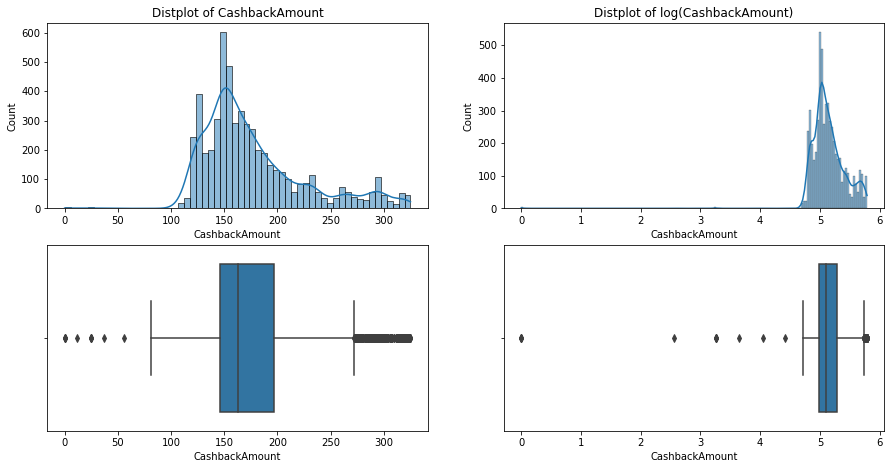

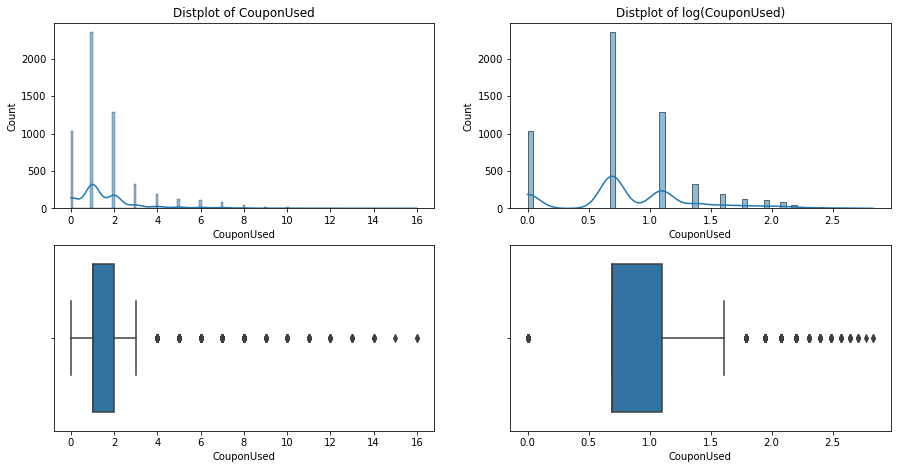

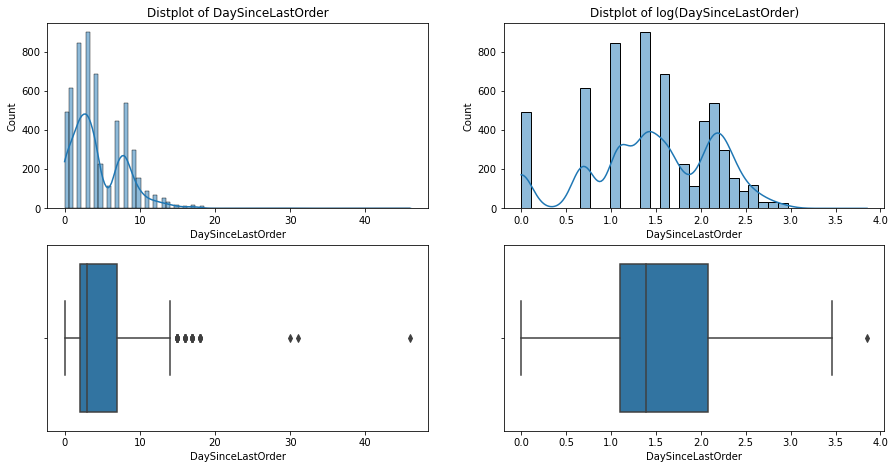

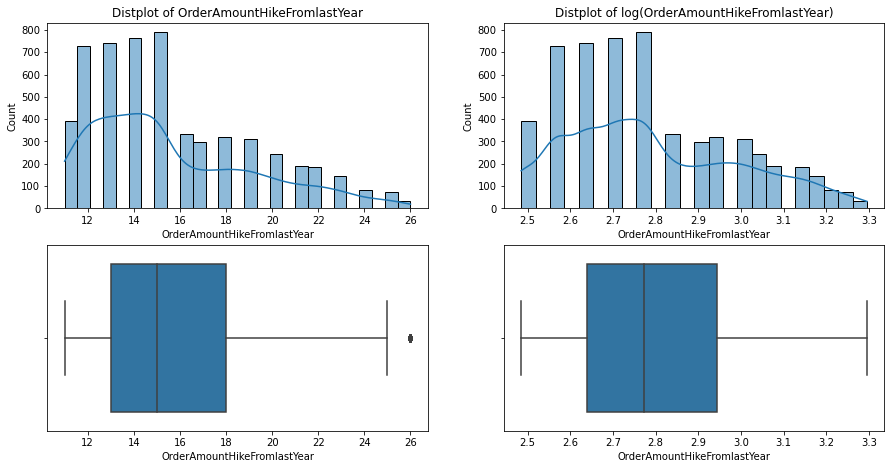

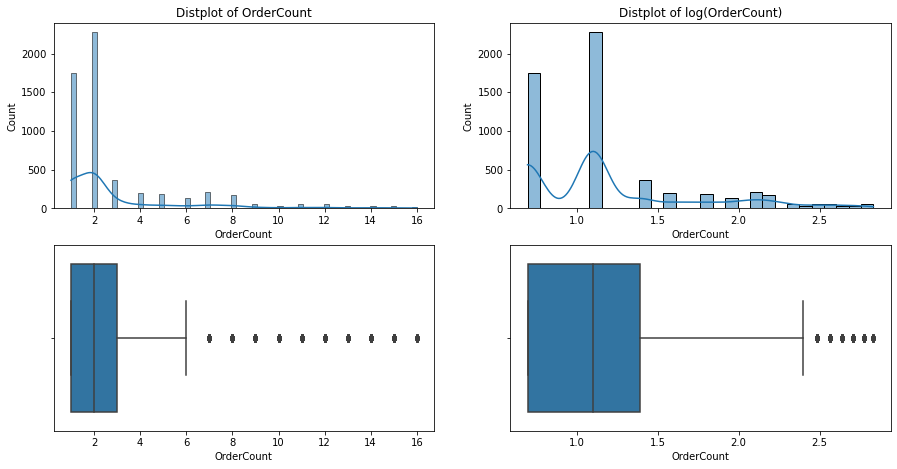

In [35]:
for i in range(0,len(nm)):
    # Create two "subplots" and a "figure" using matplotlib
    fig, ([ax_before,ax_after],[ax_1,ax_2]) = plt.subplots(2, 2, figsize=(15, 7.5))

    # Create a histogram on the "ax_before" subplot
    sns.histplot(x=nm[i], data=df_drop,ax=ax_before,kde=True)
    ax_before.set_title(f'Distplot of {nm[i]}')
    
    sns.boxplot(x=df_drop[nm[i]],ax=ax_1)
    
    # Apply a log transformation (numpy syntax) to this column
    sns.histplot(x=np.log1p(df_drop[nm[i]]),ax=ax_after,kde=True)
    ax_after.set_title(f'Distplot of log({nm[i]})')
    
    sns.boxplot(x=np.log1p(df_drop[nm[i]]),ax=ax_2)

Visually the log tranformation did not really reduce the outliers and in some cases create new outliers.

In [36]:
#create dataset of the only 5 feature
kd=df_drop[nm]

In [37]:
#calculate IQR
Q1 = kd.quantile(0.25)
Q3 = kd.quantile(0.75)
IQR = Q3 - Q1

#calculate IQR after tranform
q1 = np.log1p(kd).quantile(0.25)
q3 = np.log1p(kd).quantile(0.75)
iqr = q3 - q1

#The bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower=q1 - 1.5 * iqr
upper=q3 + 1.5 * iqr

#aggregate the number of outliers
out_before = ((kd < lower_bound) | (kd > upper_bound)).sum()
out_after=((np.log1p(kd) < lower) | (np.log1p(kd) > upper)).sum()


outliers_count = pd.DataFrame({
                    'before': out_before,
                    'after': out_after
                })
#print("Number of outliers in each numeric column:")
print(outliers_count)

                             before  after
CashbackAmount                  438    139
CouponUsed                      629   1462
DaySinceLastOrder                62      1
OrderAmountHikeFromlastYear      33      0
OrderCount                      703    227


In [38]:
df_drop["OrderAmountHikeFromlastYear"]=np.log1p(df_drop["OrderAmountHikeFromlastYear"])
df_drop["DaySinceLastOrder"]=np.log1p(df_drop["DaySinceLastOrder"])

In most feature (4 ot of 5), the outliers has been reduced so it is fair to say that it is a good tranformation. However it seems that for CouponUsed, it makes it worse. So after this there will be only 3 feature that try boxcox tranformation.

In [39]:
nam=["OrderCount"]
kdb=df_drop[nam]

Lambda value used for Transformation: -0.5754340899440025


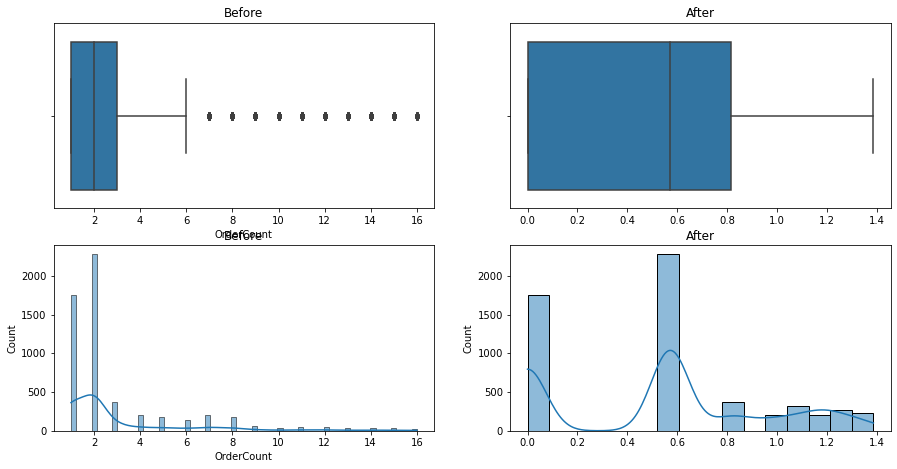

In [40]:
# transform training data & save lambda value
#fitted_data, fitted_lambda = stats.boxcox(kdb)
 
for i in range(0,len(nam)):
    # creating axes to draw plots
    data=kdb.iloc[:,i]
    fitted1, fitted_value = stats.boxcox(data)
    
    fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2, 2, figsize=(15, 7.5))
    
    sns.boxplot(x=data,ax=ax1)
    ax1.set_title("Before")
    
    sns.boxplot(x=fitted1,ax=ax2)
    ax2.set_title("After")
    
    sns.histplot(x=data,ax=ax3,kde=True)
    ax3.set_title("Before")
    
    sns.histplot(x=fitted1,kde=True,ax=ax4)
    ax4.set_title("After")
    
    print(f"Lambda value used for Transformation: {fitted_value}")
    plt.show()

In [41]:
((kdb <= 0) ).sum()

OrderCount    0
dtype: int64

In [42]:
df_drop["OrderCount"]=np.power(df_drop["OrderCount"],fitted_value)

After some reserach, i find that boxcox tranformation is not able to be done for data with zero value such as CashbackAmmount and CouponUsed therefore there should be othger way to cope with that. While the boxcox tranformation for OrderCount is going well and the distribution becoming resemble the normal curve. Therefore there is a need for another tranformation such as square for the rest of the 2 variable

In [43]:
nam=["OrderCount","CouponUsed"]
kdf=df_drop[nam]

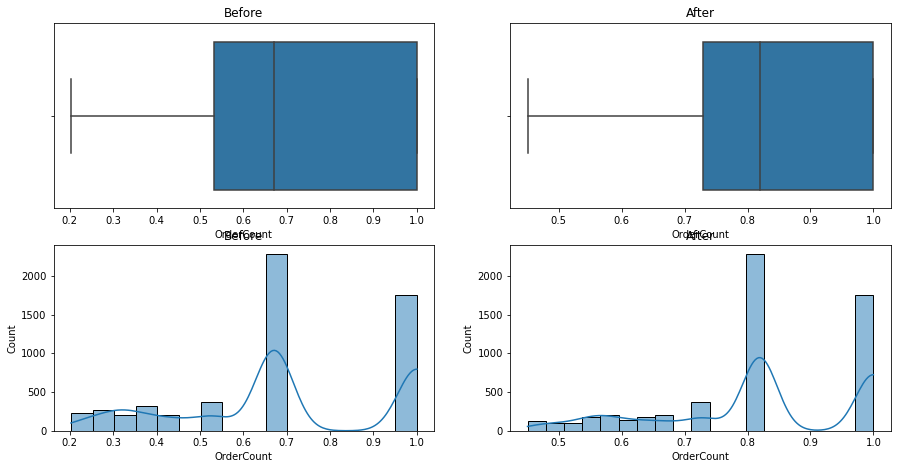

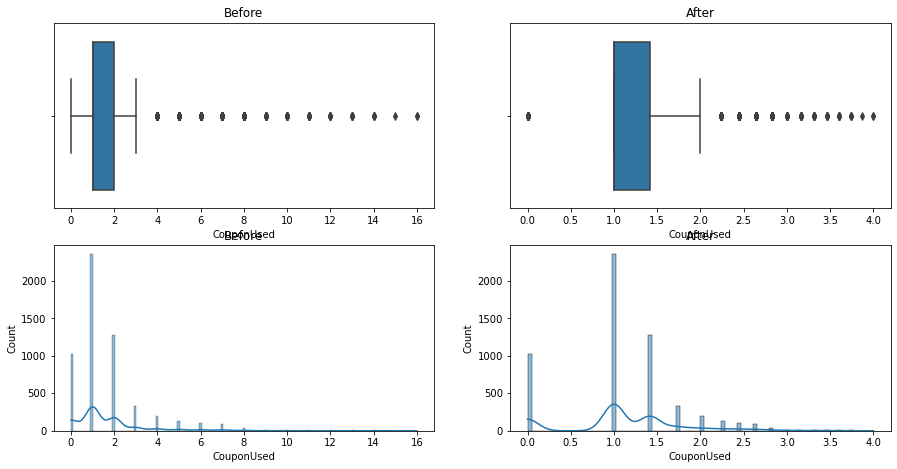

In [44]:
for i in range(0,len(nam)):
    # creating axes to draw plots
    data=kdf.iloc[:,i]
    fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2, 2, figsize=(15, 7.5))
    
    sns.boxplot(x=data,ax=ax1)
    ax1.set_title("Before")
    
    sns.boxplot(x=np.sqrt(data),ax=ax2)
    ax2.set_title("After")
    
    sns.histplot(x=data,ax=ax3,kde=True)
    ax3.set_title("Before")
    
    sns.histplot(x=np.sqrt(data),kde=True,ax=ax4)
    ax4.set_title("After")
    
    plt.show()

It seems it has improved but lest see the number of outliers

In [45]:
#calculate IQR
Q1 = kdf.quantile(0.25)
Q3 = kdf.quantile(0.75)
IQR = Q3 - Q1

#calculate IQR after tranform
q1 = np.log1p(kdf).quantile(0.25)
q3 = np.log1p(kdf).quantile(0.75)
iqr = q3 - q1

#calculate IGQ ater square
q1s=np.sqrt(kdf).quantile(0.25)
q3s= np.sqrt(kdf).quantile(0.75)

#The bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower=q1 - 1.5 * iqr
upper=q3 + 1.5 * iqr

low=q1s - 1.5 * iqr
up=q3s + 1.5 * iqr

#aggregate the number of outliers
out_before = ((kdf < lower_bound) | (kdf > upper_bound)).sum()
out_after_log=((np.log1p(kdf) < lower) | (np.log1p(kdf) > upper)).sum()
out_after_sqrt=((np.sqrt(kdf) < low) | (np.sqrt(kdf) > up)).sum()

outliers_count = pd.DataFrame({
                    'original': out_before,
                    'logaritmic': out_after_log,
                    'square':out_after_sqrt
                })
#print("Number of outliers in each numeric column:")
print(outliers_count)

            original  logaritmic  square
OrderCount         0           0       0
CouponUsed       629        1462    1462


It seems better that OrderCount have logaritmic while CouponUsed just did not need to be changed anyway.

In [46]:
df_drop["OrderCount"]=np.log1p(df_drop["OrderCount"])

In [47]:
# Time to delete the CustomerID column since it did not have any use for us later
df_drop.drop("CustomerID",axis=1)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,2.484907,1.0,0.693147,1.791759,159.93
1,1,1.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,2.772589,0.0,0.693147,0.000000,120.90
2,1,1.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,2.708050,0.0,0.693147,1.386294,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,3.178054,0.0,0.693147,1.386294,134.07
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,2.484907,1.0,0.693147,1.386294,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,2.944439,1.0,0.513473,1.609438,150.71
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,2.833213,1.0,0.513473,1.609438,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,3.091042,1.0,0.513473,1.609438,186.42
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,2.772589,2.0,0.513473,2.302585,178.90


### 4.c. Exploratory Data Analysis

#### 4.c.i. Summary Analysis 

For this matter, i shall do summary analysis for data type of float64 and object.

In [48]:
# data for object and float64 only
category=df_drop.select_dtypes(include=['object','int64']).drop(["CustomerID"],axis=1)
numerical=df_drop.select_dtypes(include=['float64'])

In [49]:
#for categorical value
for column in category:
    unique_value=category[column].value_counts()
    print(f"Value counts for '{column}':\n{unique_value}\n")

Value counts for 'Churn':
0    4676
1     948
Name: Churn, dtype: int64

Value counts for 'PreferredLoginDevice':
Mobile Phone    2762
Computer        1632
Phone           1230
Name: PreferredLoginDevice, dtype: int64

Value counts for 'CityTier':
1    3664
3    1718
2     242
Name: CityTier, dtype: int64

Value counts for 'PreferredPaymentMode':
Debit Card          2308
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value counts for 'Gender':
Male      3380
Female    2244
Name: Gender, dtype: int64

Value counts for 'NumberOfDeviceRegistered':
4    2375
3    1697
5     881
2     275
1     234
6     162
Name: NumberOfDeviceRegistered, dtype: int64

Value counts for 'PreferedOrderCat':
Laptop & Accessory    2048
Mobile Phone          1270
Fashion                826
Mobile                 808
Grocery                408
Others                 264

As stated before in subsection 4.a that most of the categorical variable did not need any change in their category however there is some that needed it such as PreferredPaymentMode and NumberOfAddress. Additionally there is the need for feature encoding on few of the categorical variable:
- PreferredLoginDevice: one-hot encoding
- PreferredPaymentMode: one-hot encoding (after some recategorisation)
- PreferredOrderCat: one-hot encoding
- MaritalStatus: one-hot encoding

Finally there will be some categorisation on the side of NumberOfAddress since perhaps for address more than 10 just being considered as more than 10 with ordinal encoding of 10 since their value are small.

In [50]:
# for the summary in numerical variable
numerical.describe()

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000
mean,10.013691,15.511558,2.934388,2.791955,1.717283,0.514431,1.478297,177.198706
std,8.336148,8.084553,0.705507,0.204868,1.858525,0.149345,0.710612,49.180465
min,0.000000,5.000000,0.000000,2.484907,0.000000,0.184668,0.000000,0.000000
25%,2.000000,9.000000,2.000000,2.639057,1.000000,0.426204,1.098612,145.765000
50%,9.000000,13.000000,3.000000,2.772589,1.000000,0.513473,1.386294,163.280000
75%,15.000000,20.000000,3.000000,2.944439,2.000000,0.693147,2.079442,196.377500
max,31.000000,36.000000,5.000000,3.295837,16.000000,0.693147,3.850148,324.990000


It seems there is 2 feature with IQR that is very big like Tenure and WarehouseToHome. However the rest has IQR that is very much not has wide IQR. The mean from most of the feature are not far away from the median (with the exception of OrderCount since it's outlier is not removed). Overall the data is quite ready.

#### 4.c.ii. Correlation

<ipython-input-51-14ef8010de41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical["Churn"]=df_drop["Churn"]


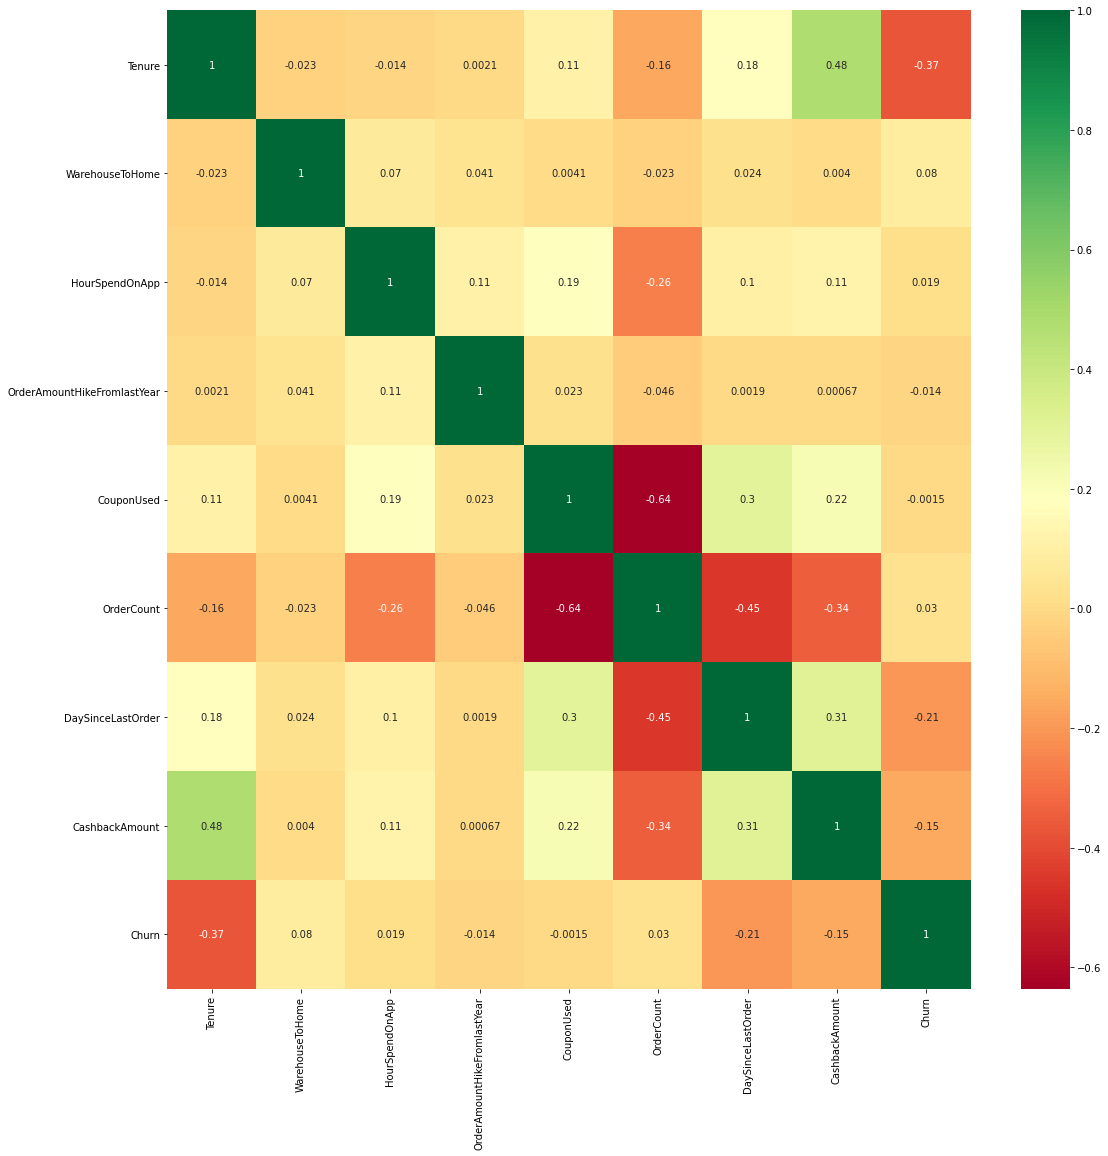

In [51]:
# the heatmap should only for the numerical variable
numerical["Churn"]=df_drop["Churn"]
dt=numerical
plt.figure(figsize=(18,18))
sns.heatmap(dt.corr(),annot=True,cmap='RdYlGn')

plt.show()

From the data above, it seems that most of the numerical feature could be considered to have no correlation. However it seems that there is few feature that correlates quite significantly (between -0.4 and 0.4):
- <u>OrderCount and CouponUsed</u> which quite strongly and has negative correlation. This is perhaps because of the coupon is more in quantity for those who buy more (in value or quantity) but this need further understanding of the data which i don't have. 
- <u>CashbackAmmount and Tenure</u> which is quite reasonable perhaps since this could become retention strategy for longer tenure customer.
- DaySinceLastOrder and OrderCount perhaps it could be reasonable in that because the customer order too little, they has less attachment to actually but from the e-commerce again or because the product itself is quite expensive or cheap so that for the expensive one has far more day since last order while the cheap one or household need is purchase more frequent. In the end it is quite reasonable.

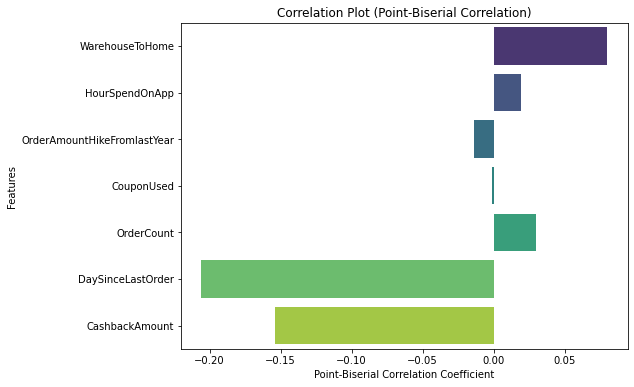

In [52]:
# Not its time to get correlation between target and other numerical feature
# Calculate point-biserial correlation coefficient for each feature
correlation_coefficients = []
numerical
DT=numerical.iloc[:,:-1]
for column in DT.columns[1:]:
    pb_corr, _ = stats.pointbiserialr(DT[column], numerical['Churn'])
    correlation_coefficients.append(pb_corr)

# Create a correlation plot
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_coefficients, y=DT.columns[1:], palette='viridis')
plt.xlabel('Point-Biserial Correlation Coefficient')
plt.ylabel('Features')
plt.title('Correlation Plot (Point-Biserial Correlation)')
plt.show()

It seems that few of the numerical feature actually do has quite weak correlation (using point biserial method for binary and numerical variable) with the Churn variable. The feature of CouponUsed seems to better to be drop anyway since it has correlation value nearing to zero anyway.

In [53]:
dta=df_drop.drop(["CouponUsed"],axis=1)
dta

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,2.484907,0.693147,1.791759,159.93
1,50002,1,1.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,2.772589,0.693147,0.000000,120.90
2,50003,1,1.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,2.708050,0.693147,1.386294,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,3.178054,0.693147,1.386294,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,2.484907,0.693147,1.386294,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,2.944439,0.513473,1.609438,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,2.833213,0.513473,1.609438,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,3.091042,0.513473,1.609438,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,2.772589,0.513473,2.302585,178.90


#### 4.c.iii. Data Visualisastion

The visualisastion on this section shall cover boxplot visualisastion between numerical variable and target variable

In [54]:
#adding column Churn to numerical
numerical=numerical.drop(["CouponUsed"],axis=1)
numerical
column_names = numerical.columns.tolist()

numerical["Churn"]=df_drop["Churn"]

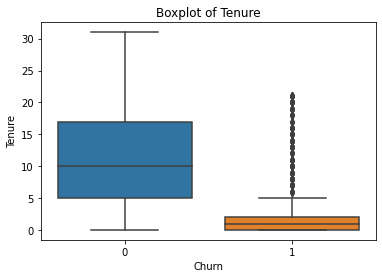

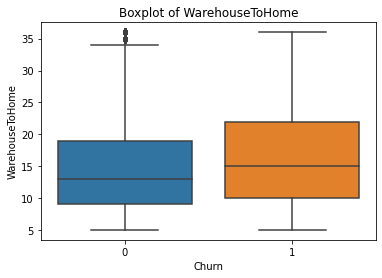

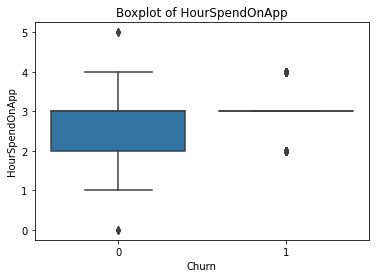

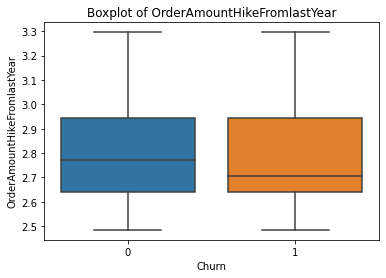

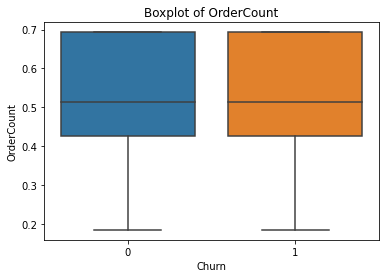

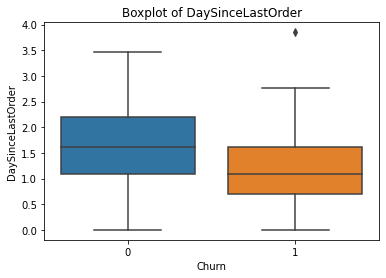

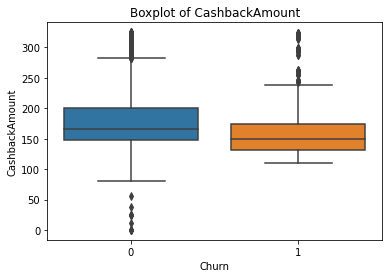

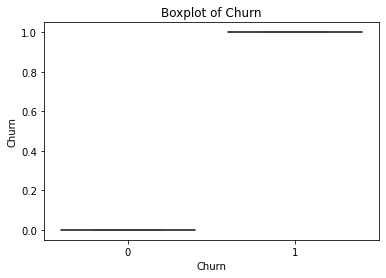

In [55]:
# for numerical variable i shall use boxplot to see their correlation with target variable
for i in range(0,len(column_names)):
    # creating axes to draw plots
    
    sns.boxplot(y=numerical[column_names[i]],x=numerical["Churn"])
    plt.title(f'Boxplot of {column_names[i]}')

    plt.show()


There is quite the diffrence of boxplots produced for different churn flag for all numerical feature with the exception of OrderCount. It seems that many outliers still exist but very prevalent on churn flag of 0. This could be due to the fact as the below result show that there is **imbalance between data with churn flag of 0 and 1**. The data with churn flag of 0 is almost 5 times the number of churn flag of 1. This need to be highlighted as this could be important later on when seeing accuracy of predicting classification. I don't has domain knowledge on Ecommerce so i really can't make any decision about data imbalance. But when i consulting Chat-GPT about is data imbalanced always bad it says it is depending on circumstances and it is better to have domain knowledge on this matter to make decision. 

However due to the fact this matter too, i am also found there could be localized patterns that exclusively belong to other category if the data is imbalanced and it is perhaps the true distribution of the data. From the above boxplot i see that i seems that Tenure and HourSpendOnApp could become strong candidate for this matter. While WarehouseToHome, DaysSinceLastOrder, and CashbackAmmount has quite a potential on this. 

In [56]:
numerical.Churn.value_counts()

0    4676
1     948
Name: Churn, dtype: int64

To see the entire localised patterns, i shall use scatterplot on the matter and then groupby them by ChurnFlag 

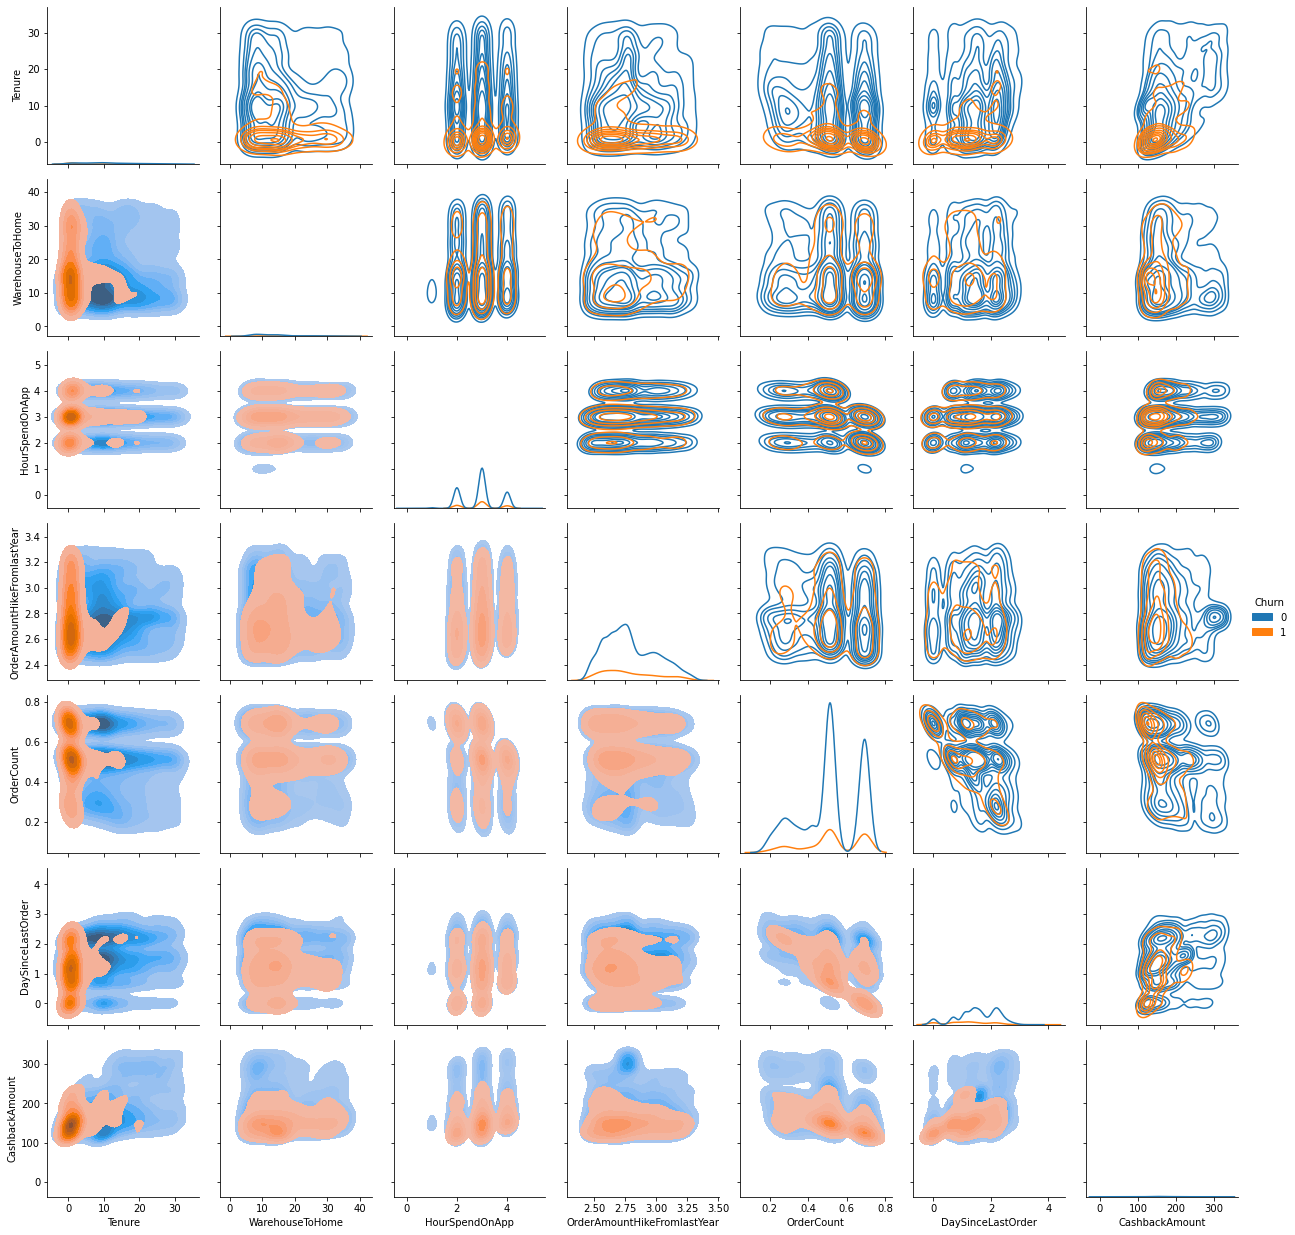

In [57]:
variable=numerical.columns.tolist()
variable=variable[:-1]

g = sns.PairGrid(numerical,vars=variable,hue="Churn")
g.map_upper(sns.kdeplot)
g.map_lower(sns.kdeplot, fill=True,shade=True)
g.map_diag(sns.kdeplot)
g.add_legend()

In general there is large spead of value for those with Churn flag of 0 while those with Churn flag of 1 is has tghter value spread.  This could indicate that there is possibility of localised pattern that could help us identify the diffrence for churn flag of 0 and 1. 
- Tenure

Then there seems intresting pattern from kdeplot especially if the accompanying variable is Tenure then there is concentration of value and in both category there is difference in concentration of value which might intresting to be able to dig further. An example is that on WarehouseToHome and Tenure, for churn flag of 1, the value is perhaps concentrated around (0,100) to (2,200). While for those with churn flag of 0 has concentration around larger value in the Tenure. This could mean that Tenure is very important as the churn flag of 0 tend to have concentration around smaller Tenure value and those with Churn flag 0 is on higher Tenure value. Mean while 

- Cashback Ammount

It seems that the spread of value for cashback value for churn flag 1 is lower than those with flag 0. However it seems that both flag do has concentration in lower value CashbackAmmount. And then there is also further intrest in CashbackAmount and Tenure in which in both flag, the CashbackAmmount is concentrated in lower value but the tenure for the both flag differs. However it seems that CashbackAmmount for those with lower Tenure has some success to retain customer. 

- WarehouseToHome

The concentration of value for both flag 0 and 1 is overlapping while the 1 has tighter concentration value than those with flag of 0. However between DaySinceLastOrder and this variable, the flag 1 has concentration value in the DaysSInceLastOrder of 1 while warehouse distance up to 20 Km.  Note that churn flag of 1 has concentration there too but can be said as more "dense" than the 0.   
- HourSpendOnApp

The concentration of value for both flag 0 and 1 is overlapping while the 1 has tighter concentration value than those with flag of 0. However it is intresting to see the relation between HourSpendOnApp and CashbackAmmount as stated on above. 
 
The overlappting continue to the rest of feature.

#### 4.c.iv. Statistics Correlation Numerical Feature and Churn

In [58]:
for column in numerical.columns:
    # Perform ANOVA
    print(f'ANOVA TEST for {column}')
    result_anova = stats.f_oneway(numerical[column][numerical['Churn'] == 0],
                              numerical[column][numerical['Churn'] == 1])
    print("ANOVA F-statistic:", result_anova.statistic)
    print("ANOVA p-value:", result_anova.pvalue)
    print("  ")

ANOVA TEST for Tenure
ANOVA F-statistic: 888.1109517256521
ANOVA p-value: 2.5423662079340537e-181
  
ANOVA TEST for WarehouseToHome
ANOVA F-statistic: 36.075951747876886
ANOVA p-value: 2.01668637888019e-09
  
ANOVA TEST for HourSpendOnApp
ANOVA F-statistic: 2.027372395693854
ANOVA p-value: 0.15454299797776125
  
ANOVA TEST for OrderAmountHikeFromlastYear
ANOVA F-statistic: 1.1464321320095767
ANOVA p-value: 0.2843432404864463
  
ANOVA TEST for OrderCount
ANOVA F-statistic: 4.97010792360838
ANOVA p-value: 0.02582839321356794
  
ANOVA TEST for DaySinceLastOrder
ANOVA F-statistic: 248.2295832213119
ANOVA p-value: 9.243797786093756e-55
  
ANOVA TEST for CashbackAmount
ANOVA F-statistic: 136.71136542845971
ANOVA p-value: 3.1975689682778277e-31
  
ANOVA TEST for Churn
ANOVA F-statistic: inf
ANOVA p-value: 0.0
  


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:3641: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


With significance level of 5 %, it is proven that all numerical feature with the exception of HourSpendOnApp, OrderAmountHikeFromlastYear is statistically has different effect or ditribution for different churn flag.

#### 4.c.iv. Categorical-Churn Relationship Through Statistics and Table 

**Recategorisation of The Categorical Feature**

There is 2 feature need to be recategorize and that is NumberOfAddress and PreferredPaymentMode

In [59]:
## To recategorize Preferred payment mode
dta['PreferredPaymentMode'] = np.where(dta['PreferredPaymentMode']=='Credit Card', 'CC', dta['PreferredPaymentMode'])
dta['PreferredPaymentMode'] = np.where(dta['PreferredPaymentMode']=='Cash on Delivery', 'COD', dta['PreferredPaymentMode'])
dta['PreferredPaymentMode'].unique().tolist()

['Debit Card', 'UPI', 'CC', 'COD', 'E wallet']

In [60]:
## To recategorize Number of Address
# so from now on number 10 is goding to describe the people with 10 or more address
dta['NumberOfAddress'] = np.where(dta['NumberOfAddress']==11, 10, dta['NumberOfAddress'])
dta['NumberOfAddress'] = np.where(dta['NumberOfAddress']==19, 10, dta['NumberOfAddress'])
dta['NumberOfAddress'] = np.where(dta['NumberOfAddress']==20, 10, dta['NumberOfAddress'])
dta['NumberOfAddress'] = np.where(dta['NumberOfAddress']==21, 10, dta['NumberOfAddress'])
dta['NumberOfAddress'] = np.where(dta['NumberOfAddress']==22, 10, dta['NumberOfAddress'])
dta['NumberOfAddress'].unique().tolist()

[9, 7, 6, 8, 3, 2, 4, 10, 1, 5]

In [61]:
dta=dta.drop(["CustomerID"],axis=1)
#dta

**Table**

In [62]:
# Cross-tabulation
category=dta.select_dtypes(include=['object','int64'])
c_cat=category.columns.tolist()
for i in range(0,len(c_cat)):
    print(f'Contingency Table for {c_cat[i]}')
    print("  ")
    cross_tab = pd.crosstab(category[c_cat[i]], category['Churn'],margins=True,rownames=[c_cat[i]],colnames=['Churn'])
    print(cross_tab)
    print("------------------------------------------------------------------")
    print("##################################################################")

Contingency Table for Churn
  
Churn     0    1   All
Churn                 
0      4676    0  4676
1         0  948   948
All    4676  948  5624
------------------------------------------------------------------
##################################################################
Contingency Table for PreferredLoginDevice
  
Churn                    0    1   All
PreferredLoginDevice                 
Computer              1308  324  1632
Mobile Phone          2414  348  2762
Phone                  954  276  1230
All                   4676  948  5624
------------------------------------------------------------------
##################################################################
Contingency Table for CityTier
  
Churn        0    1   All
CityTier                 
1         3132  532  3664
2          194   48   242
3         1350  368  1718
All       4676  948  5624
------------------------------------------------------------------
#######################################################

While contingency table is good, it is not providing too much information about the difference between fkag 0 and 1 especially since their data imbalance is so great. However it does provides something though especiqally in what category is more prevalent than the other. Such as the fact that most people has 2-3 address registered perhaps because they has 2-3 places such as their own home, place of work, and parent's house, etc. And the most people usually order Laptop&accesorry and mobile phone. Most people registered in 3-4 different devices which means that they could has more than one online devices. There is many other insight that could has been dig here but since the focus is in the end to differentiate 0 and 1 in chirn flag then the number here is not really helpful thanks to the extreme imbalance of the data which perhaps prompted me to use percentage instead.

In [64]:
# Cross-tabulation
category=dta.select_dtypes(include=['object','int64'])
c_cat=category.columns.tolist()
for i in range(0,len(c_cat)):
    print(f'Contingency Table for {c_cat[i]}')
    print("  ")
    cross_tab = pd.crosstab(category[c_cat[i]], category['Churn'],margins=True,rownames=[c_cat[i]],colnames=['Churn'],normalize='columns')
    print(cross_tab)
    print("------------------------------------------------------------------")
    print("##################################################################")

Contingency Table for Churn
  
Churn    0    1       All
Churn                    
0      1.0  0.0  0.831437
1      0.0  1.0  0.168563
------------------------------------------------------------------
##################################################################
Contingency Table for PreferredLoginDevice
  
Churn                        0         1       All
PreferredLoginDevice                              
Computer              0.279726  0.341772  0.290185
Mobile Phone          0.516253  0.367089  0.491110
Phone                 0.204021  0.291139  0.218706
------------------------------------------------------------------
##################################################################
Contingency Table for CityTier
  
Churn            0         1       All
CityTier                              
1         0.669803  0.561181  0.651494
2         0.041488  0.050633  0.043030
3         0.288708  0.388186  0.305477
------------------------------------------------------------------


There seems to be different sitribution in PreferredLoginDevices, CityTier, PreferredPaymentMode (with the exception of UPI), Complain (it seems that people with flag 1 susceptible complain), MartialStatus for between Churn flag category.

**Statistics** 

The test will be used is chi square test to see the <u>existence</u> of association between categorical feature and target variable and also Crammer V to see the strength of the association.

In [65]:
category=dta.select_dtypes(include=['object','int64'])
c_cat=category.columns.tolist()
for i in range(0,len(c_cat)):
    print(f'Cramer V for {c_cat[i]}')
    print("  ")
    contingency_table = pd.crosstab(category[c_cat[i]], category['Churn'],rownames=[c_cat[i]],colnames=['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    n = contingency_table.sum().sum()
    phi_coefficient = np.sqrt(chi2/n)

    min_dim = min(contingency_table.shape) - 1
    cramer_v = phi_coefficient / np.sqrt(min_dim)
    
    # print for chi square
    print("Chi-Square statistic:", chi2)
    print("P-value:", p)
    print("Degrees of freedom:", dof)
    print("Expected frequencies:", expected)
    
    
    print("Cramer's V:", cramer_v)
    print("------------------------------------------------------------------")
    print("##################################################################")


Cramer V for Churn
  
Chi-Square statistic: 5616.867036300123
P-value: 0.0
Degrees of freedom: 1
Expected frequencies: [[3887.79800853  788.20199147]
 [ 788.20199147  159.79800853]]
Cramer's V: 0.9993656448405179
------------------------------------------------------------------
##################################################################
Cramer V for PreferredLoginDevice
  
Chi-Square statistic: 73.51935264776608
P-value: 1.0851141230782114e-16
Degrees of freedom: 2
Expected frequencies: [[1356.90469417  275.09530583]
 [2296.42816501  465.57183499]
 [1022.66714083  207.33285917]]
Cramer's V: 0.1143347328030123
------------------------------------------------------------------
##################################################################
Cramer V for CityTier
  
Chi-Square statistic: 41.33962484347292
P-value: 1.0549078479623075e-09
Degrees of freedom: 2
Expected frequencies: [[3046.38406828  617.61593172]
 [ 201.20768137   40.79231863]
 [1428.40825036  289.59174964]]
Cramer

From the chi square result with significance value of 5% then all the categorical variable do has some association with the target feature. However the strength of the asscoiation as statetd in Cramer's V is weak (<0.4) for all the feature.

#### 4.c.vi. Encoding the Categorical Variable

For ordinal category like SatisfactionScore, NumberOfAddress, NumberOfDeviceRegistered, and CityTier shall use ordinal encoding while the rest shall use one hot encoding.

In [66]:
# for the ordinal encoding
#import some packages furst 
from sklearn.preprocessing import LabelEncoder

# create list of feature that going to be transform
ordinal=["SatisfactionScore","NumberOfAddress","NumberOfDeviceRegistered","CityTier"]

#create loop to able to transform the features
encoder = LabelEncoder()
for i in range(0,len(ordinal)):
    dta[ordinal[i]]=encoder.fit_transform(dta[ordinal[i]])

In [67]:
#for one-hot encoding
# create list of feature that going to be transform->just reduce Churn and ordinal variable from category
onehot=list(filter(lambda x: x not in ordinal, c_cat))
onehot.remove("Churn")
onehot

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus',
 'Complain']

In [68]:
#make copy for the data before this one-hot encoding
df_final=dta.copy()
df_final

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,2,6.0,Debit Card,Female,3.0,2,Laptop & Accessory,1,Single,8,1,2.484907,0.693147,1.791759,159.93
1,1,1.0,Phone,0,8.0,UPI,Male,3.0,3,Mobile,2,Single,6,1,2.772589,0.693147,0.000000,120.90
2,1,1.0,Phone,0,30.0,Debit Card,Male,2.0,3,Mobile,2,Single,5,1,2.708050,0.693147,1.386294,120.28
3,1,0.0,Phone,2,15.0,Debit Card,Male,2.0,3,Laptop & Accessory,4,Single,7,0,3.178054,0.693147,1.386294,134.07
4,1,0.0,Phone,0,12.0,CC,Male,3.0,2,Mobile,4,Single,2,0,2.484907,0.693147,1.386294,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,0,30.0,CC,Male,3.0,1,Laptop & Accessory,0,Married,5,0,2.944439,0.513473,1.609438,150.71
5626,0,13.0,Mobile Phone,0,13.0,CC,Male,3.0,4,Fashion,4,Married,5,0,2.833213,0.513473,1.609438,224.91
5627,0,1.0,Mobile Phone,0,11.0,Debit Card,Male,3.0,1,Laptop & Accessory,3,Married,2,1,3.091042,0.513473,1.609438,186.42
5628,0,23.0,Computer,2,9.0,CC,Male,4.0,4,Laptop & Accessory,3,Married,3,0,2.772589,0.513473,2.302585,178.90


In [69]:
#create loop to able to transform the features
# will makes the first category as the reference category
df_final=pd.get_dummies(df_final,columns=onehot,drop_first=True)

In [70]:
for i in range(0,len(onehot)):
    print(dta[onehot[i]].value_counts())


Mobile Phone    2762
Computer        1632
Phone           1230
Name: PreferredLoginDevice, dtype: int64
Debit Card    2308
CC            1774
E wallet       614
COD            514
UPI            414
Name: PreferredPaymentMode, dtype: int64
Male      3380
Female    2244
Name: Gender, dtype: int64
Laptop & Accessory    2048
Mobile Phone          1270
Fashion                826
Mobile                 808
Grocery                408
Others                 264
Name: PreferedOrderCat, dtype: int64
Married     2982
Single      1796
Divorced     846
Name: MaritalStatus, dtype: int64
0    4022
1    1602
Name: Complain, dtype: int64


In [71]:
df_final.columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'OrderCount', 'DaySinceLastOrder',
       'CashbackAmount', 'PreferredLoginDevice_Mobile Phone',
       'PreferredLoginDevice_Phone', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_UPI', 'Gender_Male', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Complain_1'],
      dtype='object')

### 4.d. Conclusion On EDA

In my conclusion about the EDA that happens, it seems that statistically both numerical and categorical features in the data has moderate to low correlation to the target variable. However i do find that there is some pattern that could help identify the flag 1 such in Tenure which for churn flag 1 has lesser value than those of the 0. This will be the one that being tested in Hypotesis testing. In the end i already do:
1. Do data cleaning
2. Handling the outliers as best of my ability
3. summary on feature
4. exploring realtion between numerical and target variable (through boxplots)
5. do bivariate analysis between 2 numerical variable but categorised through churn flag (though kdeplot)
6. prove whtever or not for numerical feature, category in target feature actually has different distribution or in general is "different" between category (through ANOVA)
7. create contingency table for categorical feature and target feature
8. use chi-square and cramer's V to see the xistence of association between categorical and target feature and also measure the asscociation
9. do some recategorisation for few feature
10. doing encoding on the categorical feature both for ordinal and non-ordinal

## 5. Hypotesis Creation and Hypotesis Testing

### 5.a. Hypotesis Creation

Based on the patterns i saw, i have formulated few hypotesis
1. The value of mean for feature Tenure with churn flag 0 is larger than those with churn flag 1?
2. The person with churn flag of 1 is more likely to have complain than those with churn flag of 1?
3. The spread of value for CashbackAmmount for churn flag 1 is lower than those with churn flag of 0?

For the 3 hypotesis above here is the test i shall use and the reason why i choose such test (signifinace level of 5%):
1. Mann Whitney U test

Without the normal distribution in Tenure and extreme data imbalance between Churn flag, it seems that this test is the most suitable. However the two group i going to test seems not to be independent enough since they are actually just a subset of one data. However with that 2 restrictions, it is better to have this test anyway.

$H_{0}$: There is no difference Tenure between distribution between those with Churn flag of 0 and 1
$H_{1}$: The Tenure value for churn flag of 1 is lower than those with churn flag of 0

2. Z-test

Actually the same with the no 1 with the exception of the data imbalance. There is my concern with independence and random sampling but anyway

$H_{0}$: There is no difference of proprtion of complain between Churn flag of 0 and 1
$H_{1}$: The proprtion of complain value for churn flag of 1 is higher than those with churn flag of 0

3. I havent found the test suitable for this one. I hope to have non-parametric test to get around the normality assumptions. But the non parametric only able to see if the variance or spread of the different group is different not less or larger. Therefore i will not do test for this one.

### 5.b. Hypotesis Testing

In [72]:
# flag of 0
df_zero= df_final[df_final["Churn"]==0]

#flag of 1
df_one=df_final[df_final["Churn"]==1]

In [73]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(df_one["Tenure"], df_zero["Tenure"], alternative='less')

In [74]:
print(statistic)
print(p_value)

769697.5
2.6032225635093702e-222


Based on signifinace level of 5%, the null hypotesis is rejected (since the p-value<5%) and it is proven that The Tenure value for churn flag of 1 is lower than those with churn flag of 0. This means that overall, if the Tenure for certain customer is low then they are likely to be Churn Flag of 1. Although this is a good indication to seperate the category, i think that in the next analysis it will be better to test the mean or median to get the more accurate result about seek which tenure value that is more leaning for churn flag 1 since this could be "critical value" to indicate customer churn status.

In [75]:
import statsmodels.api as sm

# Perform Z-test for proportions
group_a=df_zero["Complain_1"]
group_b=df_one["Complain_1"]

count_a = sum(group_a)
count_b = sum(group_b)
nobs_a = len(group_a)
nobs_b = len(group_b)
z_stat, p_value = sm.stats.proportions_ztest([count_b, count_a], [nobs_b, nobs_a], alternative='larger')


In [76]:
print(z_stat)
print(p_value)

18.77937468288604
5.569204189888864e-79


It seems that on this matter the null hypotesis is rejected in which it is true that proportion for complain for flag 1 is higher than those with flag of 0. This means on a whole, the customer with churn value 1 is the one with complain in last month. While we don't know what happen in the complain or what satusfaction customer they has on complain this result does tell something. This indicates the need for makes sure that complain are handle properly since the people with complain could go to churn flag 1 rather than 0. This hypotesis testing however did not answer the question that if the customer has complain in last month which flag the customer is likely to fall into. For that there is need to see using proprtion with Complain flag of 1 and comparing the one owned by churn flag 0 and 1. 

## 6. Suggestion For the Next Analysis

This analysis is probably one of the most comprehenseive EDA i ever has. Regardless there is some limitation in my analysis and findings as well as my actions. Therefore the suggestion to the next analysis is as follows:
1. **Considering not only to handle missing value and outliers but also if the distribution is already "normal" enough**. I did not do this since i want to preserve the distribution of the data and the fact that i do not know what algorithm to actually make model out of this. However there is no need to make various tarnformations since there is the need of interpretability in the model, if your model is good but you can't interpret it then it is useless.

2. **Think backward for the hypotesis analysis**, perhaps this could help since i was stuck because thinking foward with the obsession with tarhet feature

3. **Consider which feature will be used and then try to dig more into it exclusively**

## 7. Conclusion

The data quality in here is perhaps to me is overall good to practice EDA since there is complete problem to actually processing it. It has logically speakeing good feature and has clearly defined target variable which helps in makig direction for analysis. The data itself in terms of structure is quite imbalanced with one churn category has almost 5 times the other value which does hinder the analysis and overall has really big problems with outliers which need to be considered. If there is any data that i could has, that will be more context on the data and the meaning on the flag. For the added data, there should also be the "value" of the order and age of the customer could help in the analysis.